In [1]:
# 라이브러리

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
'''
ID: ID of the customer

Age: Age of the customer in completed years

Experience: Amount of work experience in years

Income: Amount of annual income (in thousands)

Zipcode: Postal code in which the client lives

Family: Number of family members

CCAvg: Average monthly spending with the credit card (in thousands)

Education: Education level (1: bachelor's degree, 2: master's degree, 3: advanced/professional degree)

Mortgage: Value of home mortgage, if any (in thousands)

Securities Account: Does the customer have a securities account with the bank?

CD Account: Does the customer have a certificate of deposit account (CD) with the bank?

Online: Does the customer use the internet banking facilities?

CreditCard: Does the customer use a credit card issued by the bank?

Personal Loan: Did this customer accept the personal loan offered in the last campaign? (Target Variable)
'''

"\nID: ID of the customer\n\nAge: Age of the customer in completed years\n\nExperience: Amount of work experience in years\n\nIncome: Amount of annual income (in thousands)\n\nZipcode: Postal code in which the client lives\n\nFamily: Number of family members\n\nCCAvg: Average monthly spending with the credit card (in thousands)\n\nEducation: Education level (1: bachelor's degree, 2: master's degree, 3: advanced/professional degree)\n\nMortgage: Value of home mortgage, if any (in thousands)\n\nSecurities Account: Does the customer have a securities account with the bank?\n\nCD Account: Does the customer have a certificate of deposit account (CD) with the bank?\n\nOnline: Does the customer use the internet banking facilities?\n\nCreditCard: Does the customer use a credit card issued by the bank?\n\nPersonal Loan: Did this customer accept the personal loan offered in the last campaign? (Target Variable)\n"

### 기본정보 확인

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
len(df.columns)

14

In [4]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
df[['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Personal Loan']]

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Securities Account  CD Account  Online  CreditCard  \
0            0                   1           0       0           0   
1            0                   1           0       0           0   
2            0                   0           0       0           0   
3            0                   0           0       0           0   
4            0                   0           0       0           1   
...        ...                 ...         ...     ...         ...   
4995         0                   0           0       1           0   
4996        85                   0           0       1           0   
4997         0                   0           0       0           0   
4998         0                   0           0       1           0   
4999         0                   0           0       1           1   

      Personal Loan  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
4995              0  
4996              0  
4997              0  
4998              0  
4999              0  

[5000 rows x 14 columns]

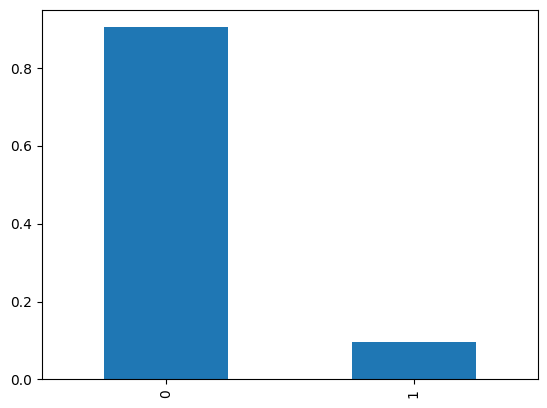

In [7]:
df['Personal Loan'].value_counts(normalize=True).plot.bar()
plt.show()

In [8]:
df['Personal Loan'].value_counts(normalize='True')

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

### 데이터 전처리

In [5]:
dtypes = pd.DataFrame(df.dtypes)

In [6]:
nas = df.isna().sum()

In [7]:
li = []
for i in df.columns : 
    li.append(df[i].nunique())

In [8]:
uni = pd.DataFrame(li)

In [9]:
uni.index = df.columns

In [10]:
a = df.describe(include='all').T

In [11]:
pre = pd.concat([dtypes, nas, uni, a], axis=1)

In [12]:
pre

0  0     0   count          mean          std  \
ID                    int64  0  5000  5000.0   2500.500000  1443.520003   
Age                   int64  0    45  5000.0     45.338400    11.463166   
Experience            int64  0    47  5000.0     20.104600    11.467954   
Income                int64  0   162  5000.0     73.774200    46.033729   
ZIP Code              int64  0   467  5000.0  93152.503000  2121.852197   
Family                int64  0     4  5000.0      2.396400     1.147663   
CCAvg               float64  0   108  5000.0      1.937938     1.747659   
Education             int64  0     3  5000.0      1.881000     0.839869   
Mortgage              int64  0   347  5000.0     56.498800   101.713802   
Personal Loan         int64  0     2  5000.0      0.096000     0.294621   
Securities Account    int64  0     2  5000.0      0.104400     0.305809   
CD Account            int64  0     2  5000.0      0.060400     0.238250   
Online                int64  0     2  5000.0      0.596800     0.490589   
CreditCard            int64  0     2  5000.0      0.294000     0.455637   

                       min       25%      50%       75%      max  
ID                     1.0   1250.75   2500.5   3750.25   5000.0  
Age                   23.0     35.00     45.0     55.00     67.0  
Experience            -3.0     10.00     20.0     30.00     43.0  
Income                 8.0     39.00     64.0     98.00    224.0  
ZIP Code            9307.0  91911.00  93437.0  94608.00  96651.0  
Family                 1.0      1.00      2.0      3.00      4.0  
CCAvg                  0.0      0.70      1.5      2.50     10.0  
Education              1.0      1.00      2.0      3.00      3.0  
Mortgage               0.0      0.00      0.0    101.00    635.0  
Personal Loan          0.0      0.00      0.0      0.00      1.0  
Securities Account     0.0      0.00      0.0      0.00      1.0  
CD Account             0.0      0.00      0.0      0.00      1.0  
Online                 0.0      0.00      1.0      1.00      1.0  
CreditCard             0.0      0.00      0.0      1.00      1.0

In [13]:
pre.columns

Index([0, 0, 0, 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [17]:
pre.columns = ['dtype','missing value', 'unique value', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

In [18]:
pre.T[['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard','Personal Loan']].T

dtype missing value unique value   count       mean  \
ID                    int64             0         5000  5000.0     2500.5   
Age                   int64             0           45  5000.0    45.3384   
Experience            int64             0           47  5000.0    20.1046   
Income                int64             0          162  5000.0    73.7742   
ZIP Code              int64             0          467  5000.0  93152.503   
Family                int64             0            4  5000.0     2.3964   
CCAvg               float64             0          108  5000.0   1.937938   
Education             int64             0            3  5000.0      1.881   
Mortgage              int64             0          347  5000.0    56.4988   
Securities Account    int64             0            2  5000.0     0.1044   
CD Account            int64             0            2  5000.0     0.0604   
Online                int64             0            2  5000.0     0.5968   
CreditCard            int64             0            2  5000.0      0.294   
Personal Loan         int64             0            2  5000.0      0.096   

                            std     min      25%      50%      75%      max  
ID                  1443.520003     1.0  1250.75   2500.5  3750.25   5000.0  
Age                   11.463166    23.0     35.0     45.0     55.0     67.0  
Experience            11.467954    -3.0     10.0     20.0     30.0     43.0  
Income                46.033729     8.0     39.0     64.0     98.0    224.0  
ZIP Code            2121.852197  9307.0  91911.0  93437.0  94608.0  96651.0  
Family                 1.147663     1.0      1.0      2.0      3.0      4.0  
CCAvg                  1.747659     0.0      0.7      1.5      2.5     10.0  
Education              0.839869     1.0      1.0      2.0      3.0      3.0  
Mortgage             101.713802     0.0      0.0      0.0    101.0    635.0  
Securities Account     0.305809     0.0      0.0      0.0      0.0      1.0  
CD Account              0.23825     0.0      0.0      0.0      0.0      1.0  
Online                 0.490589     0.0      0.0      1.0      1.0      1.0  
CreditCard             0.455637     0.0      0.0      0.0      1.0      1.0  
Personal Loan          0.294621     0.0      0.0      0.0      0.0      1.0

In [14]:
df = df[['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Personal Loan']]

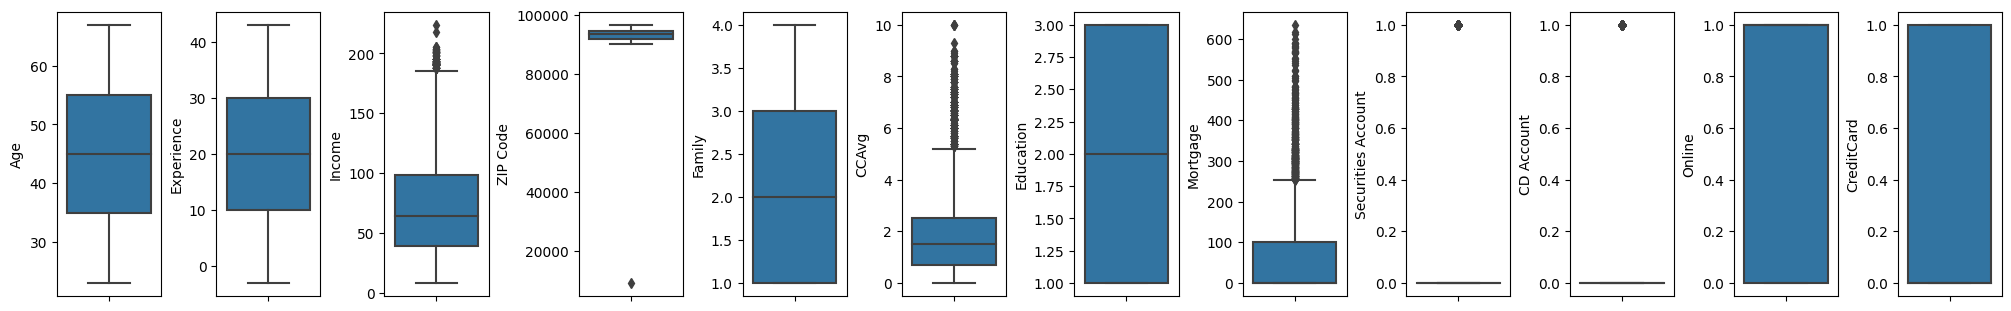

In [15]:
fig, axs = plt.subplots(figsize=(20,3), nrows=1, ncols=len(df.columns)-2, constrained_layout=True)

for idx, col in enumerate(df.columns[1:-1]) :
    sns.boxplot(data=df, y= col, ax = axs[idx])

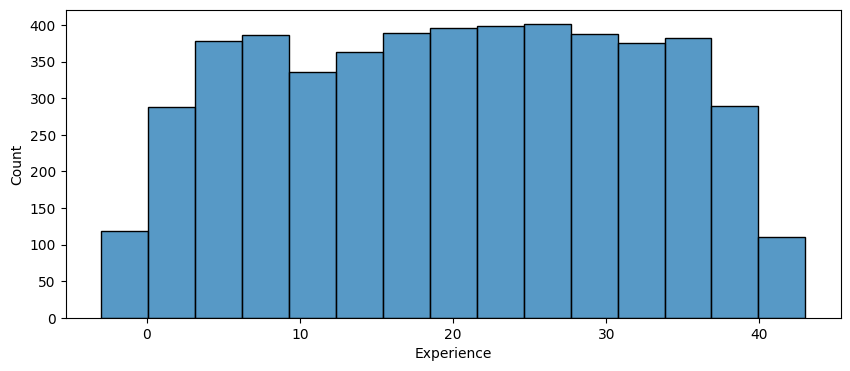

In [22]:
plt.figure(figsize = (10,4))
sns.histplot(data=df, x = 'Experience', bins=15)
plt.show()

In [23]:
df[df['ZIP Code'] < 20000]

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
384  385   51          25      21      9307       4    0.6          3   

     Mortgage  Securities Account  CD Account  Online  CreditCard  \
384         0                   0           0       1           1   

     Personal Loan  
384              0

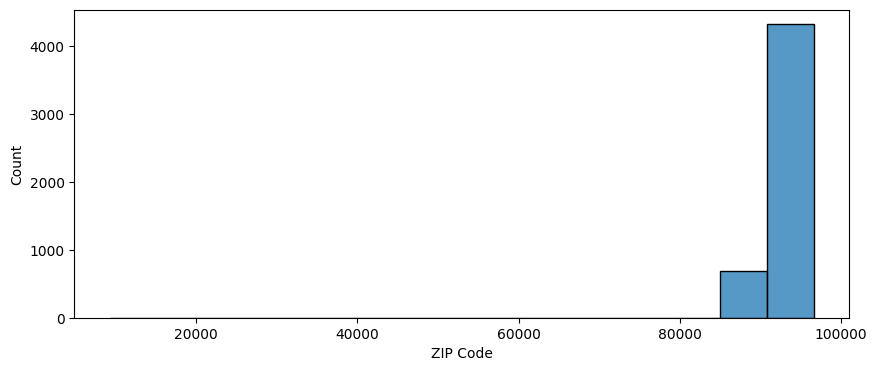

In [24]:
plt.figure(figsize = (10,4))
sns.histplot(data=df, x = 'ZIP Code', bins=15)
plt.show()

In [25]:
len(df[df['Experience'] < 0 ])

52

### 이상치 처리

In [19]:
df[df['ZIP Code'].astype('str').str.contains('9300')]

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
659    660   63          39      79     93009       4    1.7          2   
1555  1556   59          33      49     93009       4    1.7          2   
1792  1793   46          20     118     93009       1    5.7          1   
3363  3364   58          34      54     93003       4    1.3          2   
3423  3424   61          35      38     93009       2    1.0          3   
3752  3753   55          30      82     93003       4    1.3          3   
4000  4001   62          37      93     93003       3    3.0          3   
4576  4577   55          30      41     93003       2    0.6          3   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
659          0              0                   0           0       1   
1555       104              0                   0           0       1   
1792         0              0                   0           1       1   
3363         0              0                   0           0       1   
3423         0              0                   0           0       0   
3752       219              0                   0           0       0   
4000         0              1                   0           1       1   
4576         0              0                   0           0       1   

      CreditCard  
659            1  
1555           0  
1792           1  
3363           0  
3423           0  
3752           1  
4000           1  
4576           1

In [20]:
df[df['ZIP Code'].astype('str').str.contains('70')]

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
66      67   62          36     105     95670       2    2.8          1   
103    104   43          18      22     95670       2    0.3          2   
105    106   24           0      35     94704       3    0.1          2   
113    114   58          34      92     92703       2    2.8          1   
142    143   33           9      48     91770       1    2.1          3   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4884  4885   60          34      50     95670       3    2.2          3   
4893  4894   42          12      39     94704       3    2.0          3   
4940  4941   46          22      19     92870       3    0.5          1   
4965  4966   29           5      33     94709       1    1.8          2   
4983  4984   51          26      72     95370       1    2.9          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
66         336              0                   0           0       0   
103          0              0                   0           0       1   
105          0              0                   1           0       1   
113        103              0                   0           0       0   
142          0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4884         0              0                   0           0       1   
4893         0              0                   1           1       1   
4940         0              0                   0           0       1   
4965        78              0                   0           0       1   
4983         0              0                   0           0       0   

      CreditCard  
66             0  
103            0  
105            0  
113            0  
142            1  
...          ...  
4884           1  
4893           1  
4940           0  
4965           0  
4983           0  

[145 rows x 14 columns]

In [21]:
df[df['ZIP Code'].astype('str').str.contains('9307')]

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
384  385   51          25      21      9307       4    0.6          3   

     Mortgage  Personal Loan  Securities Account  CD Account  Online  \
384         0              0                   0           0       1   

     CreditCard  
384           1

In [22]:
df.loc[384, 'ZIP Code'] = 93070

In [23]:
df.iloc[384:385,:]

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
384  385   51          25      21     93070       4    0.6          3   

     Mortgage  Personal Loan  Securities Account  CD Account  Online  \
384         0              0                   0           0       1   

     CreditCard  
384           1

In [24]:
df.corr()

ID       Age  Experience    Income  ZIP Code  \
ID                  1.000000 -0.008473   -0.008326 -0.017695  0.002241   
Age                -0.008473  1.000000    0.994215 -0.055269 -0.030530   
Experience         -0.008326  0.994215    1.000000 -0.046574 -0.030456   
Income             -0.017695 -0.055269   -0.046574  1.000000 -0.030708   
ZIP Code            0.002241 -0.030530   -0.030456 -0.030708  1.000000   
Family             -0.016797 -0.046418   -0.052563 -0.157501  0.027511   
CCAvg              -0.024675 -0.052012   -0.050077  0.645984 -0.012188   
Education           0.021463  0.041334    0.013152 -0.187524 -0.008267   
Mortgage           -0.013920 -0.012539   -0.010582  0.206806  0.003614   
Personal Loan      -0.024801 -0.007726   -0.007413  0.502462 -0.002974   
Securities Account -0.016972 -0.000436   -0.001232 -0.002616  0.002422   
CD Account         -0.006909  0.008043    0.010353  0.169738  0.021671   
Online             -0.002528  0.013702    0.013898  0.014206  0.028316   
CreditCard          0.017028  0.007681    0.008967 -0.002385  0.024032   

                      Family     CCAvg  Education  Mortgage  Personal Loan  \
ID                 -0.016797 -0.024675   0.021463 -0.013920      -0.024801   
Age                -0.046418 -0.052012   0.041334 -0.012539      -0.007726   
Experience         -0.052563 -0.050077   0.013152 -0.010582      -0.007413   
Income             -0.157501  0.645984  -0.187524  0.206806       0.502462   
ZIP Code            0.027511 -0.012188  -0.008267  0.003614      -0.002974   
Family              1.000000 -0.109275   0.064929 -0.020445       0.061367   
CCAvg              -0.109275  1.000000  -0.136124  0.109905       0.366889   
Education           0.064929 -0.136124   1.000000 -0.033327       0.136722   
Mortgage           -0.020445  0.109905  -0.033327  1.000000       0.142095   
Personal Loan       0.061367  0.366889   0.136722  0.142095       1.000000   
Securities Account  0.019994  0.015086  -0.010812 -0.005411       0.021954   
CD Account          0.014110  0.136534   0.013934  0.089311       0.316355   
Online              0.010354 -0.003611  -0.015004 -0.005995       0.006278   
CreditCard          0.011588 -0.006689  -0.011014 -0.007231       0.002802   

                    Securities Account  CD Account    Online  CreditCard  
ID                           -0.016972   -0.006909 -0.002528    0.017028  
Age                          -0.000436    0.008043  0.013702    0.007681  
Experience                   -0.001232    0.010353  0.013898    0.008967  
Income                       -0.002616    0.169738  0.014206   -0.002385  
ZIP Code                      0.002422    0.021671  0.028316    0.024032  
Family                        0.019994    0.014110  0.010354    0.011588  
CCAvg                         0.015086    0.136534 -0.003611   -0.006689  
Education                    -0.010812    0.013934 -0.015004   -0.011014  
Mortgage                     -0.005411    0.089311 -0.005995   -0.007231  
Personal Loan                 0.021954    0.316355  0.006278    0.002802  
Securities Account            1.000000    0.317034  0.012627   -0.015028  
CD Account                    0.317034    1.000000  0.175880    0.278644  
Online                        0.012627    0.175880  1.000000    0.004210  
CreditCard                   -0.015028    0.278644  0.004210    1.000000

In [32]:
df[df['Experience'] < 0 ].mean()

ID                     2427.346154
Age                      24.519231
Experience               -1.442308
Income                   69.942308
ZIP Code              93240.961538
Family                    2.865385
CCAvg                     2.129423
Education                 2.076923
Mortgage                 43.596154
Securities Account        0.115385
CD Account                0.000000
Online                    0.576923
CreditCard                0.288462
Personal Loan             0.000000
dtype: float64

In [33]:
df[(df['Experience'] <= 3) & (df['Experience'] > 0)].mean()

ID                     2330.093750
Age                      27.576389
Experience                2.190972
Income                   79.753472
ZIP Code              93335.006944
Family                    2.750000
CCAvg                     1.939306
Education                 1.861111
Mortgage                 67.888889
Securities Account        0.093750
CD Account                0.052083
Online                    0.565972
CreditCard                0.284722
Personal Loan             0.118056
dtype: float64

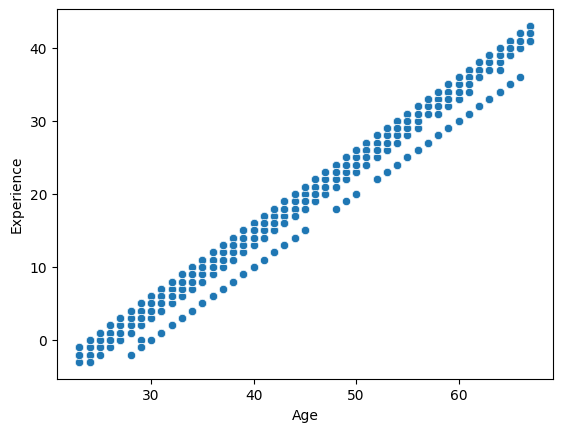

In [34]:
sns.scatterplot(data=df, x='Age', y='Experience')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Experience'>

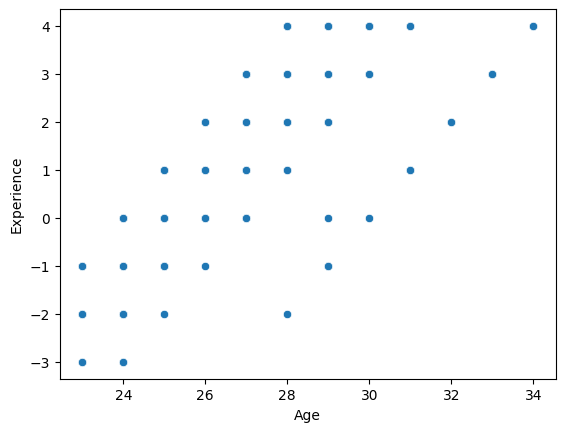

In [35]:
sns.scatterplot(data=df[df['Experience']< 5], x='Age', y='Experience')

In [25]:
df['Experience'] = df['Experience'] + 3

<AxesSubplot:xlabel='Age', ylabel='Experience'>

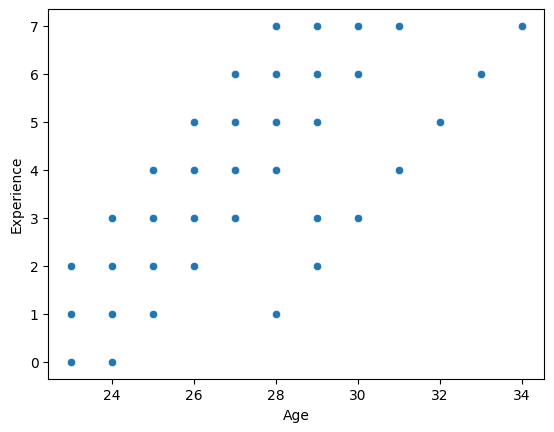

In [26]:
sns.scatterplot(data=df[df['Experience']< 8], x='Age', y='Experience')

In [27]:
df.describe(include='all').T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     23.104600    11.467954      0.0     13.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIP Code            5000.0  93169.255600  1759.455163  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities Account  5000.0      0.104400     0.305809      0.0      0.00   
CD Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             23.0     33.00     46.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [86]:
df['CCAvg'] = df['CCAvg'] * 12

In [29]:
len(df[df['Income'] < df['CCAvg']])

15

In [30]:
df['Income'].quantile(.85)

128.0

<AxesSubplot:>

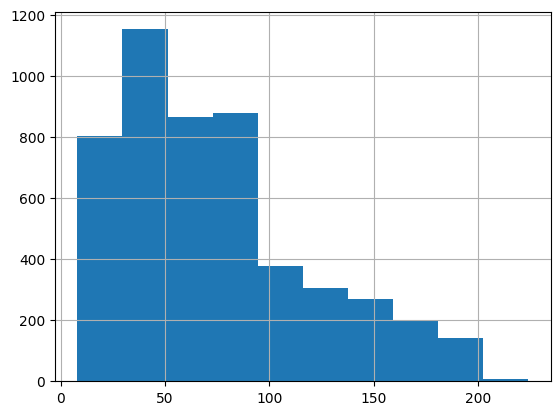

In [42]:
df['Income'].hist()

In [43]:
df['Income'].quantile(.20)

33.0

<AxesSubplot:>

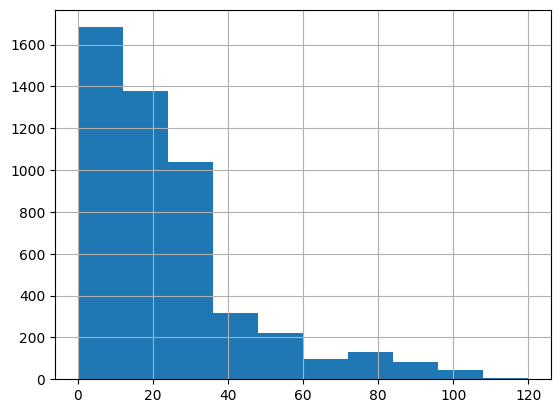

In [44]:
df['CCAvg'].hist()

### EDA

In [16]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Personal Loan'],
      dtype='object')

In [99]:
df_ordered = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg','Mortgage','ZIP Code',
       'Education',  'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Personal Loan']]

#### 상관관계

<AxesSubplot:>

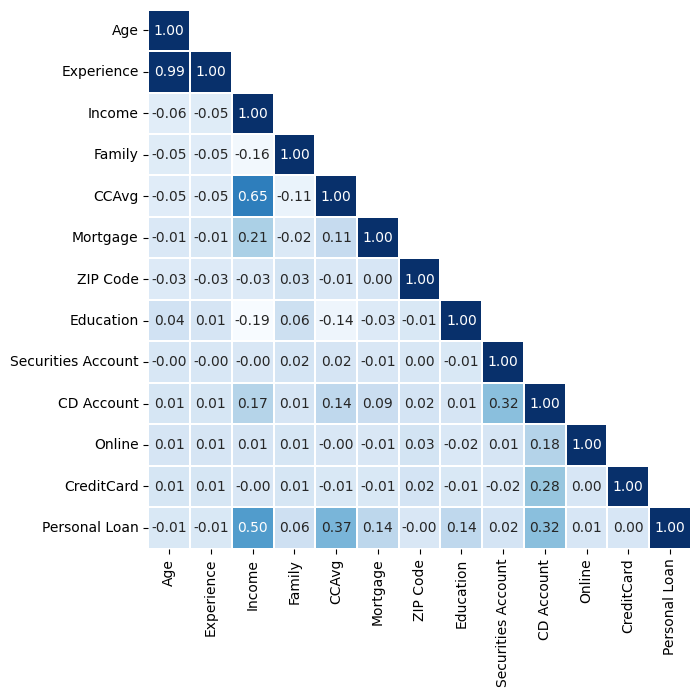

In [47]:
corr = df_ordered.corr()

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

plt.figure(figsize=(7,7))
sns.heatmap(corr, mask=mask, annot=True, cmap='Blues', fmt='.2f', linewidths=0.2, cbar=False)

<AxesSubplot:xlabel='Income', ylabel='CCAvg'>

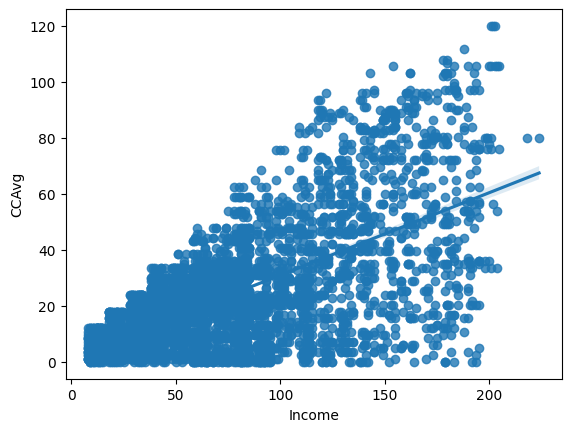

In [48]:
sns.regplot(data=df_ordered, x= 'Income', y='CCAvg')

In [49]:
df_ordered[df_ordered['Personal Loan'] == 1].iloc[:,:-1]

Age  Experience  Income  Family  CCAvg  Mortgage  ZIP Code  Education  \
9      34          12     180       1  106.8         0     93023          3   
16     38          17     130       4   56.4       134     95010          3   
18     46          24     193       2   97.2         0     91604          3   
29     38          16     119       1   39.6         0     94104          2   
38     42          21     141       3   60.0         0     94114          3   
...   ...         ...     ...     ...    ...       ...       ...        ...   
4883   38          16     129       3   49.2         0     92646          3   
4927   43          22     121       1    8.4         0     94720          2   
4941   28           7     112       2   19.2         0     90049          2   
4962   46          23     122       3   36.0         0     90065          3   
4980   29           8     135       3   63.6         0     95762          1   

      Securities Account  CD Account  Online  CreditCard  
9                      0           0       0           0  
16                     0           0       0           0  
18                     0           0       0           0  
29                     0           1       1           1  
38                     1           1       1           0  
...                  ...         ...     ...         ...  
4883                   0           1       1           1  
4927                   0           1       1           1  
4941                   0           0       1           0  
4962                   0           1       1           1  
4980                   0           1       1           1  

[480 rows x 12 columns]

<AxesSubplot:>

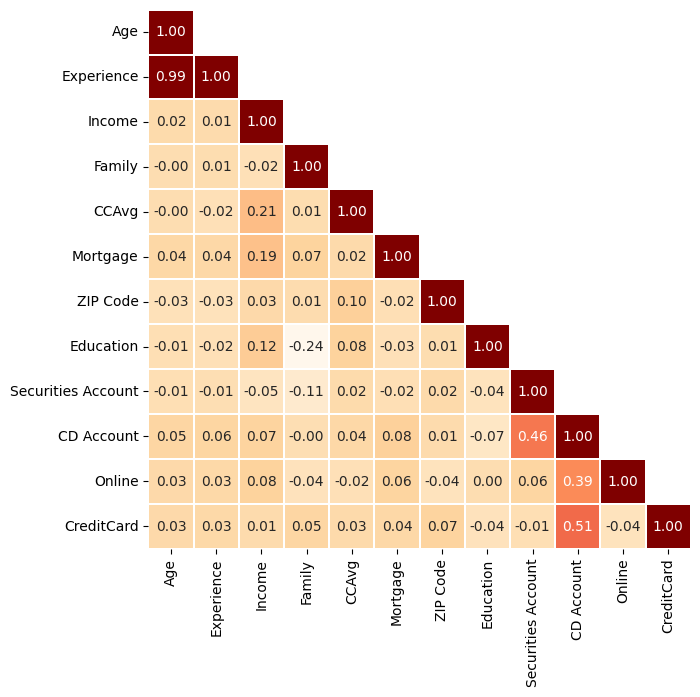

In [50]:
corr = df_ordered[df_ordered['Personal Loan'] == 1].iloc[:,:-1].corr()

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

plt.figure(figsize=(7,7))
sns.heatmap(corr, mask=mask, annot=True, cmap='OrRd', fmt='.2f', linewidths=0.2, cbar=False)

<AxesSubplot:xlabel='Income', ylabel='CCAvg'>

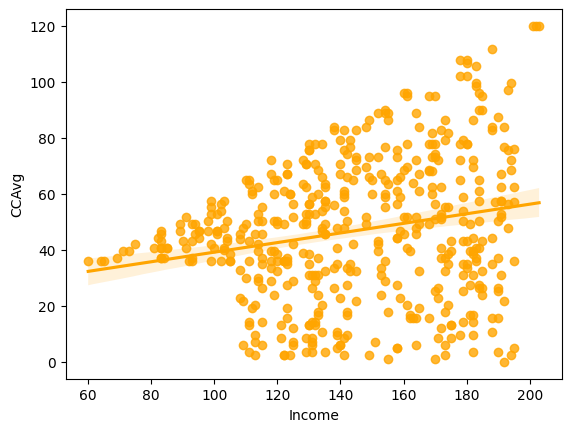

In [51]:
sns.regplot(data=df_ordered[df_ordered['Personal Loan'] == 1], x= 'Income', y='CCAvg', color='Orange')

<AxesSubplot:>

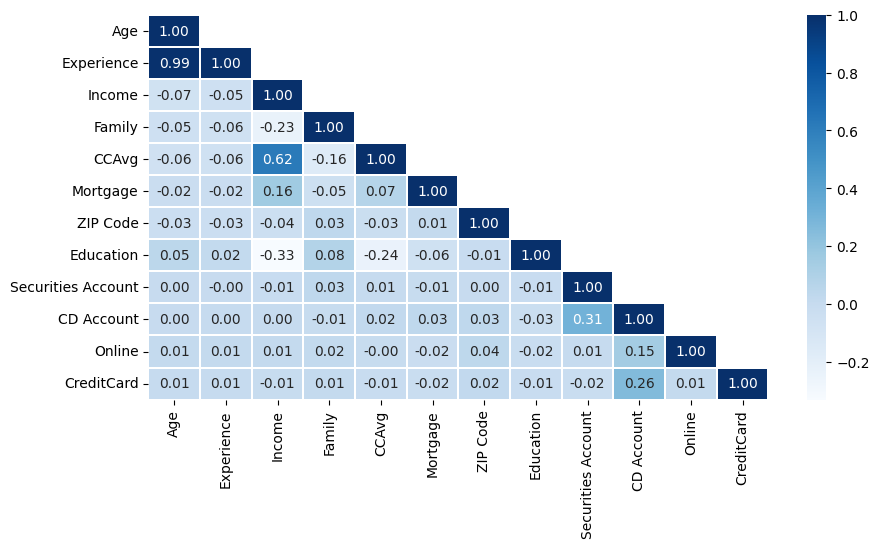

In [52]:
corr = df_ordered[df_ordered['Personal Loan'] == 0].iloc[:,:-1].corr()

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

plt.figure(figsize=(10,5))
sns.heatmap(corr, mask=mask, annot=True, cmap='Blues', fmt='.2f', linewidths=0.2)

In [53]:
len(df_ordered[df_ordered['Mortgage'] > 0])

1538

<AxesSubplot:>

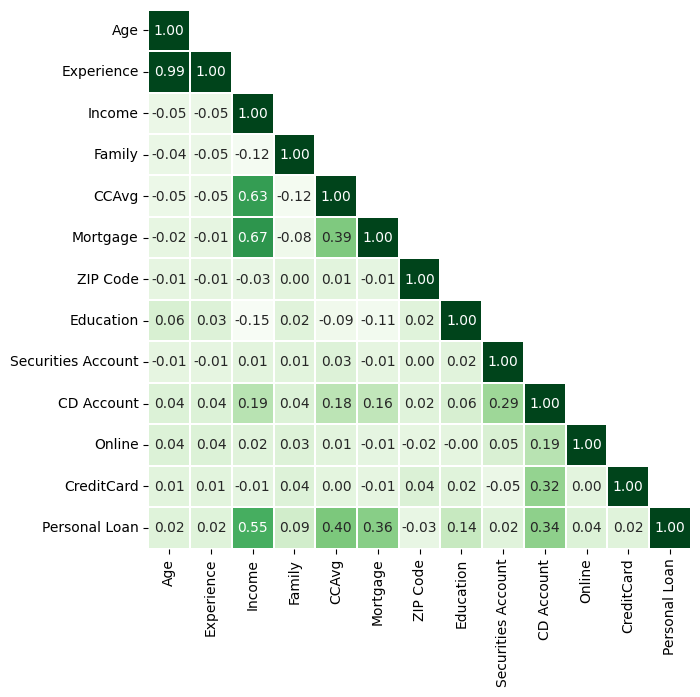

In [54]:
corr = df_ordered[df_ordered['Mortgage'] > 0].corr()

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

plt.figure(figsize=(7,7))
sns.heatmap(corr, mask=mask, annot=True, cmap='Greens', fmt='.2f', linewidths=0.2, cbar=False)

<AxesSubplot:xlabel='Income', ylabel='Mortgage'>

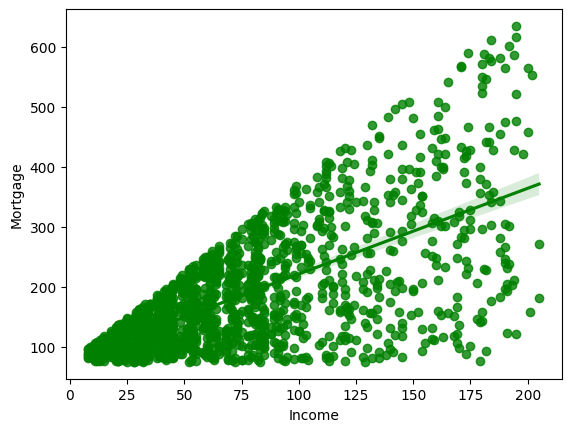

In [55]:
sns.regplot(data=df_ordered[df_ordered['Mortgage'] > 0], x= 'Income', y='Mortgage', color='Green')

<AxesSubplot:xlabel='Income', ylabel='Mortgage'>

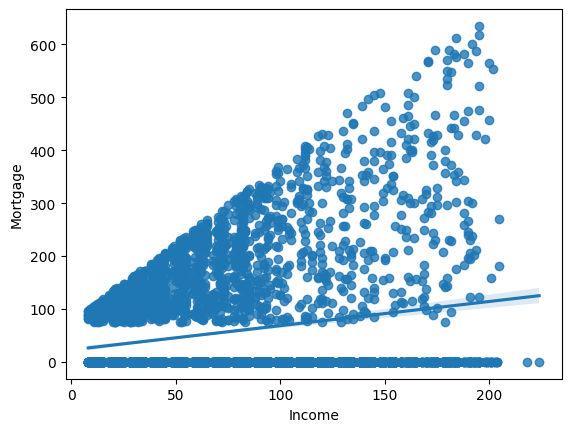

In [56]:
sns.regplot(data=df_ordered, x= 'Income', y='Mortgage')

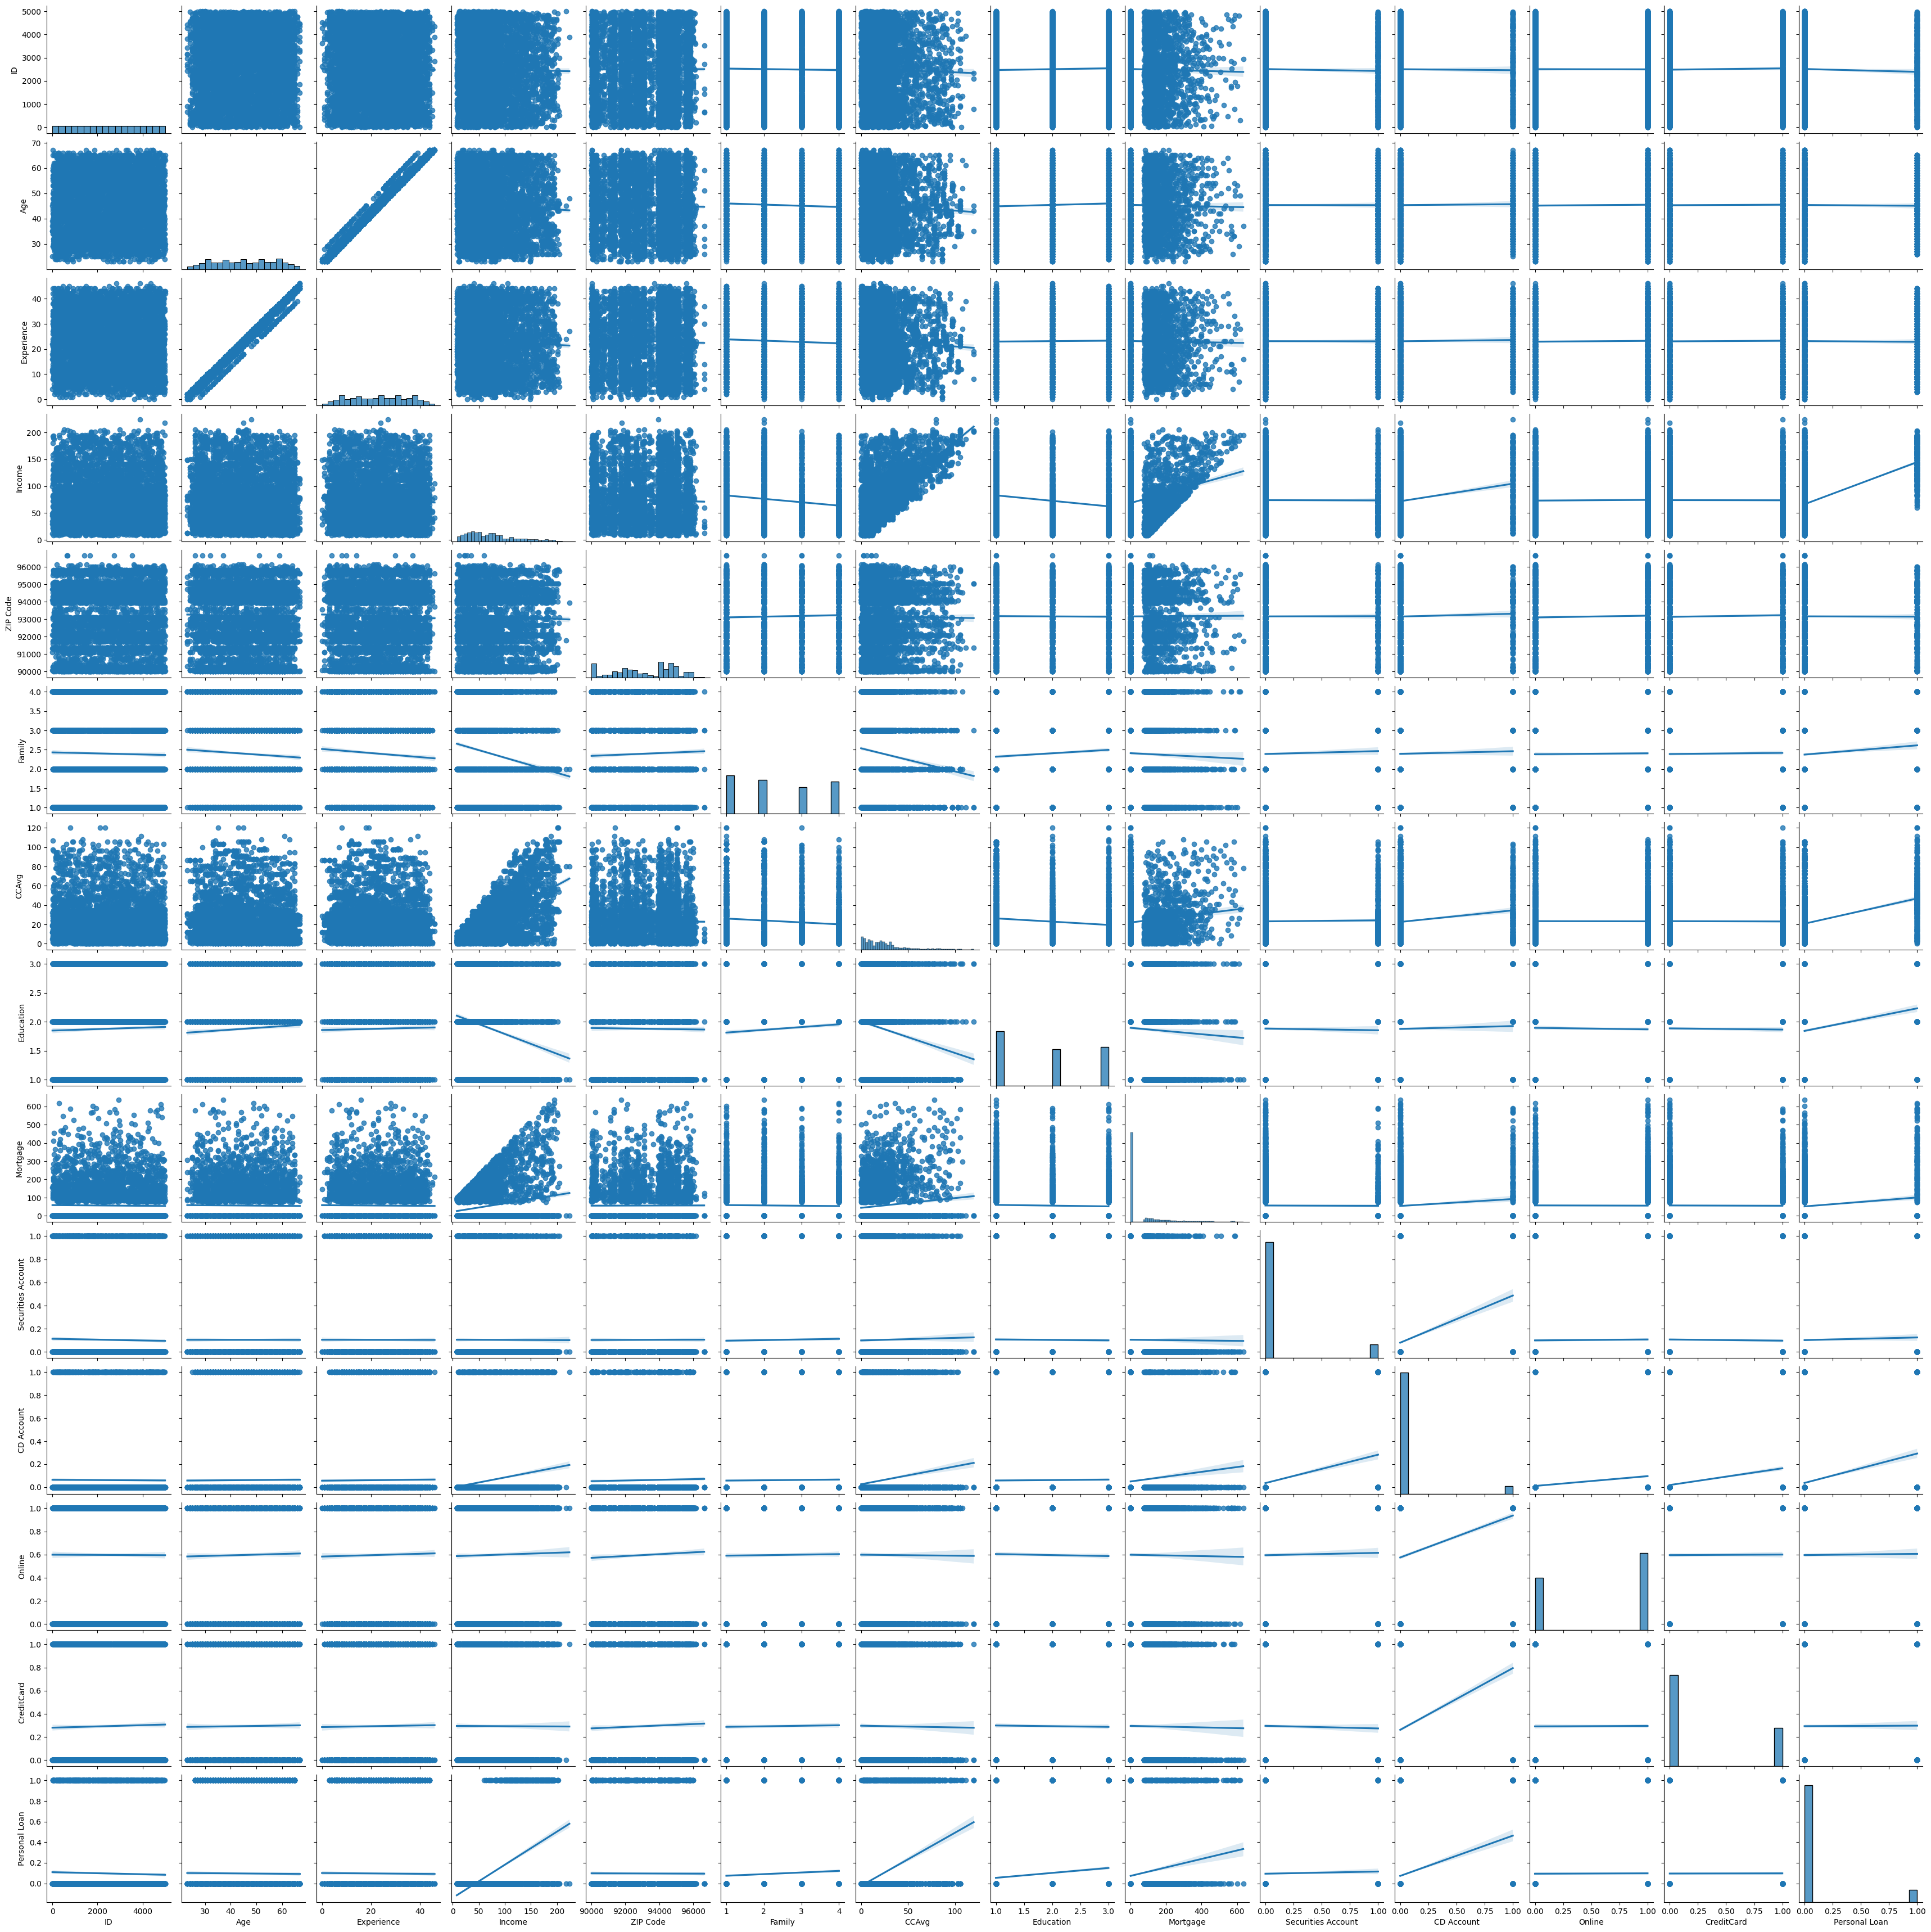

In [57]:
sns.pairplot(data=df, kind='reg')
plt.show()

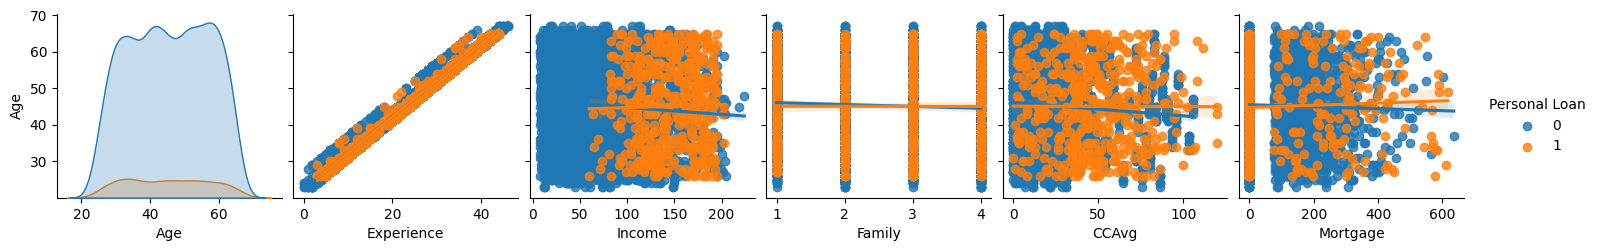

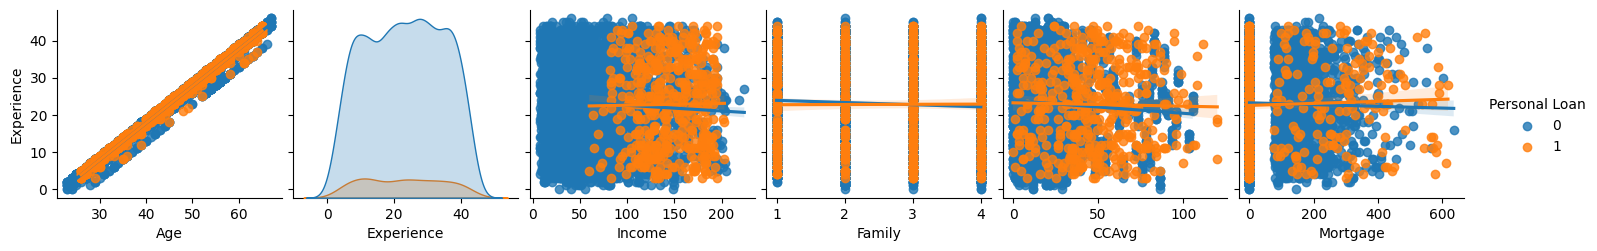

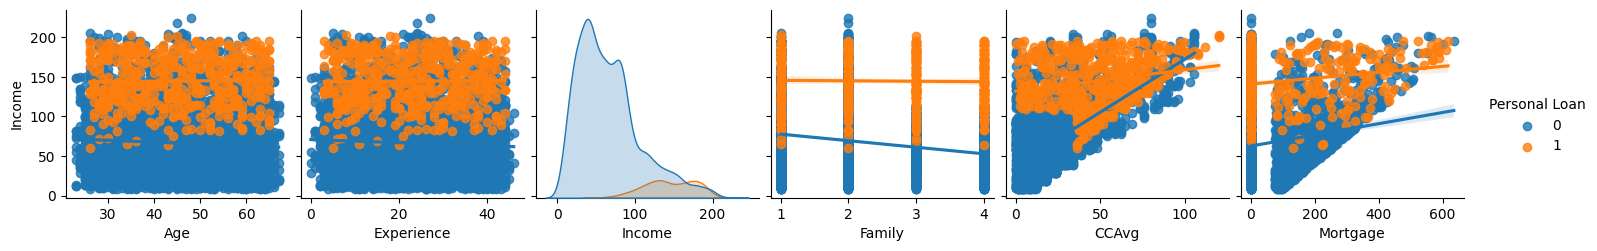

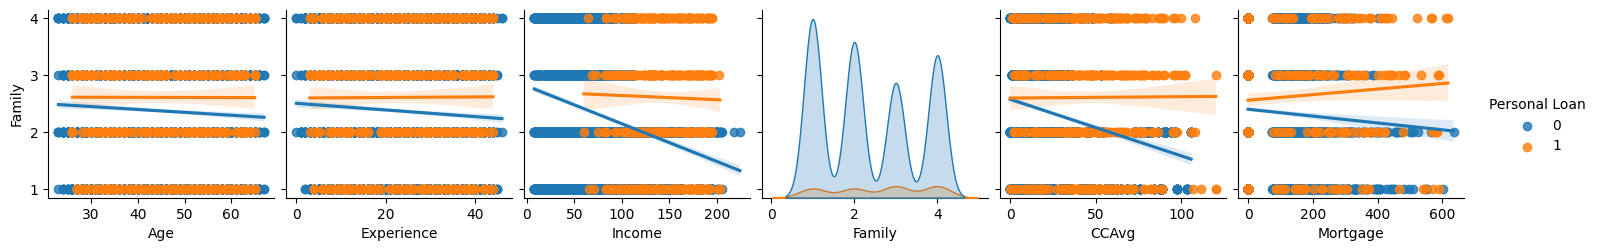

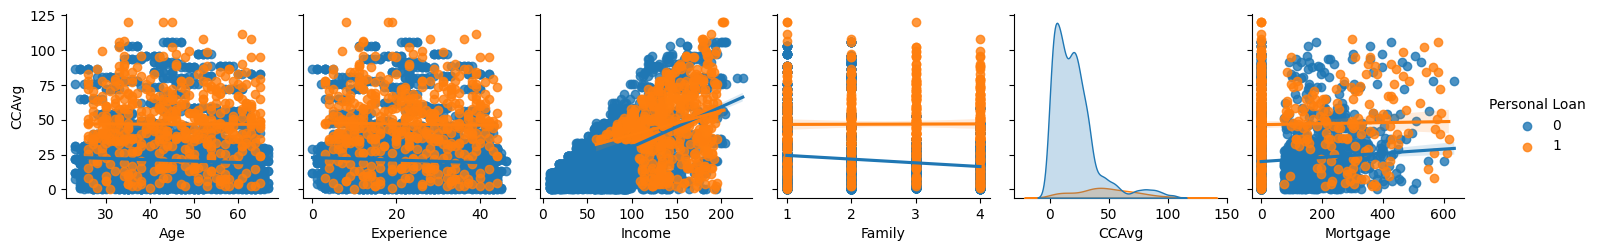

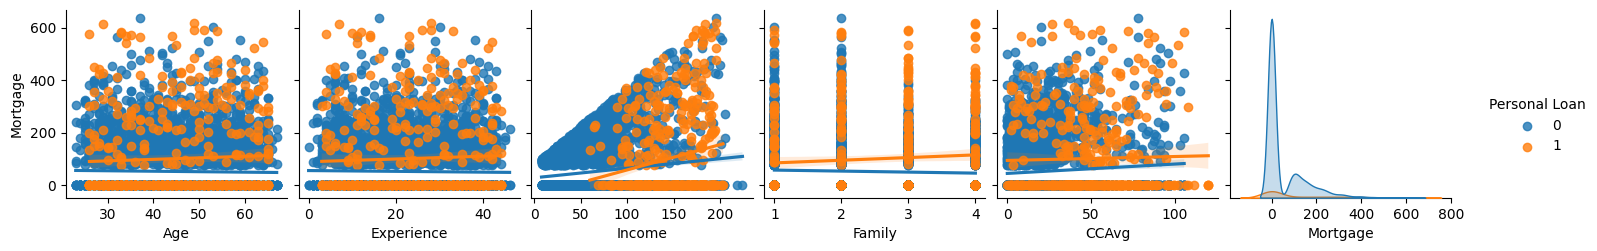

In [58]:
for col in ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage'] :

    sns.pairplot(data=df_ordered, y_vars=col , x_vars= df_ordered.columns[0:6], kind = 'reg', hue='Personal Loan')

#### 이변량 분석(수치형 변수)

In [19]:
df_ordered.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage',
       'ZIP Code', 'Education', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Personal Loan'],
      dtype='object')

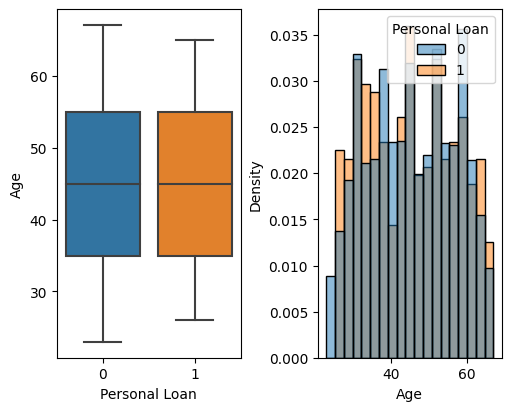

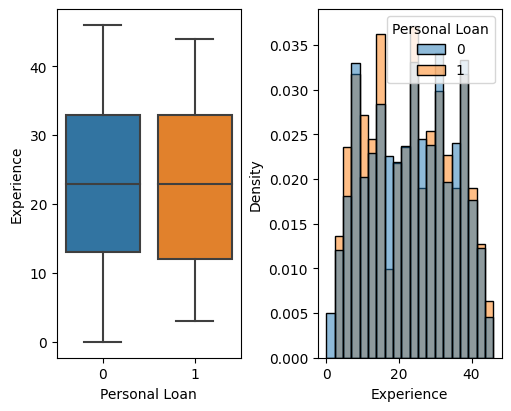

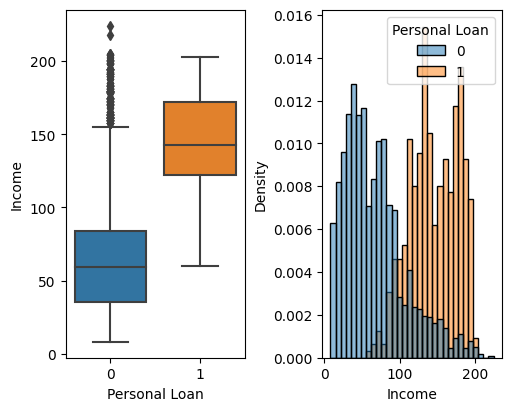

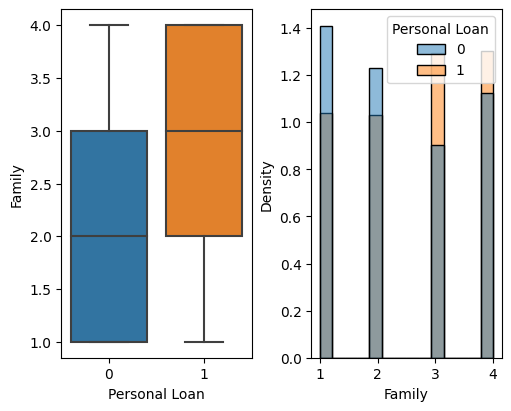

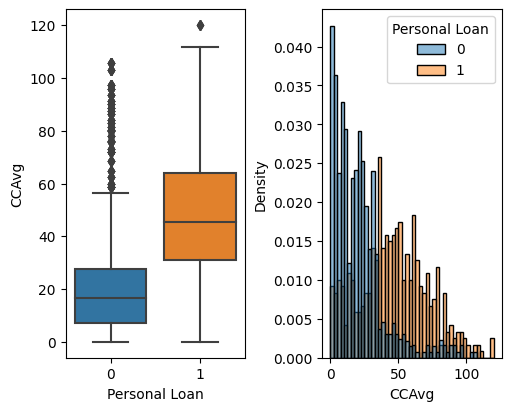

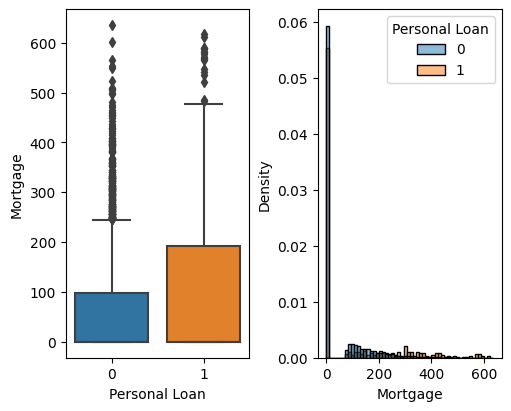

In [60]:
for col in ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage'] :

    fig, axs = plt.subplots(figsize=(5,4), nrows=1, ncols=2,constrained_layout=True)

    sns.boxplot(data= df_ordered, y=col , x='Personal Loan', ax = axs[0])
    sns.histplot(data=df_ordered, x=col, hue="Personal Loan", stat="density", linewidth=1, common_norm=False, ax = axs[1])
    
    sns.move_legend(axs[1], "upper right")
    
    plt.show()

In [61]:
df_ordered.groupby(by='Personal Loan').mean()

Age  Experience      Income    Family      CCAvg  \
Personal Loan                                                           
0              45.367257   23.132301   66.237389  2.373451  20.748106   
1              45.066667   22.843750  144.745833  2.612500  46.864250   

                 Mortgage      ZIP Code  Education  Securities Account  \
Personal Loan                                                            
0               51.789381  93170.960398   1.843584            0.102212   
1              100.845833  93153.202083   2.233333            0.125000   

               CD Account    Online  CreditCard  
Personal Loan                                    
0                0.035841  0.595796    0.293584  
1                0.291667  0.606250    0.297917

In [62]:
df_ordered.groupby(by='Personal Loan').median()

Age  Experience  Income  Family  CCAvg  Mortgage  ZIP Code  \
Personal Loan                                                                
0              45.0        23.0    59.0     2.0   16.8       0.0   93437.0   
1              45.0        23.0   142.5     3.0   45.6       0.0   93407.0   

               Education  Securities Account  CD Account  Online  CreditCard  
Personal Loan                                                                 
0                    2.0                 0.0         0.0     1.0         0.0  
1                    2.0                 0.0         0.0     1.0         0.0

In [63]:
df_ordered[df_ordered['Mortgage'] > 0].groupby(by='Personal Loan').mean()

Age  Experience      Income    Family      CCAvg  \
Personal Loan                                                           
0              45.075182   22.866423   64.382482  2.368613  19.949343   
1              45.982143   23.708333  148.029762  2.702381  46.931429   

                 Mortgage      ZIP Code  Education  Securities Account  \
Personal Loan                                                            
0              170.867153  93205.750365   1.839416            0.101460   
1              288.130952  93028.005952   2.214286            0.119048   

               CD Account    Online  CreditCard  
Personal Loan                                    
0                0.043066  0.586861    0.287591  
1                0.333333  0.648810    0.315476

In [64]:
df_ordered[df_ordered['Mortgage'] > 0].groupby(by='Personal Loan').count()

Age  Experience  Income  Family  CCAvg  Mortgage  ZIP Code  \
Personal Loan                                                                
0              1370        1370    1370    1370   1370      1370      1370   
1               168         168     168     168    168       168       168   

               Education  Securities Account  CD Account  Online  CreditCard  
Personal Loan                                                                 
0                   1370                1370        1370    1370        1370  
1                    168                 168         168     168         168

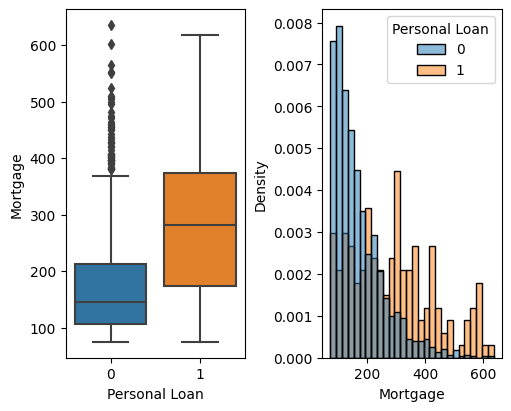

In [65]:
for col in ['Mortgage'] :

    fig, axs = plt.subplots(figsize=(5,4), nrows=1, ncols=2,constrained_layout=True)

    sns.boxplot(data= df_ordered[df_ordered['Mortgage'] > 0], y=col , x='Personal Loan', ax = axs[0])
    sns.histplot(data=df_ordered[df_ordered['Mortgage'] > 0], x=col, hue="Personal Loan", stat="density", linewidth=1, common_norm=False, ax = axs[1])
    
    sns.move_legend(axs[1], "upper right")
    
    plt.show()

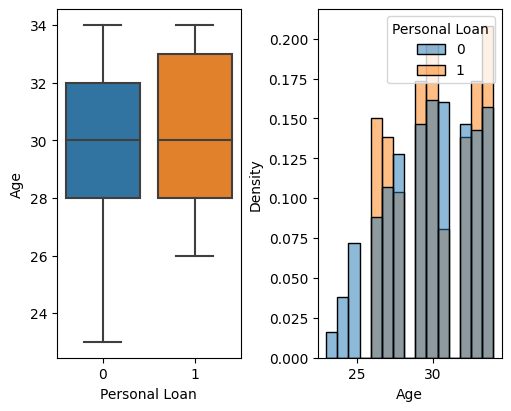

In [66]:
for col in ['Age'] :

    fig, axs = plt.subplots(figsize=(5,4), nrows=1, ncols=2,constrained_layout=True)

    sns.boxplot(data= df_ordered[df_ordered['Age'] < 35], y=col , x='Personal Loan', ax = axs[0])
    sns.histplot(data=df_ordered[df_ordered['Age'] < 35], x=col, hue="Personal Loan", stat="density", linewidth=1, common_norm=False, ax = axs[1])
    
    sns.move_legend(axs[1], "upper right")
    
    plt.show()

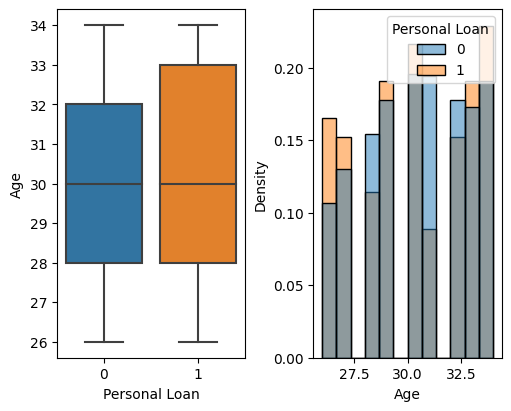

In [67]:
for col in ['Age'] :

    fig, axs = plt.subplots(figsize=(5,4), nrows=1, ncols=2,constrained_layout=True)

    sns.boxplot(data= df_ordered[(df_ordered['Age'] < 35) & (df_ordered['Age'] > 25)], y=col , x='Personal Loan', ax = axs[0])
    sns.histplot(data= df_ordered[(df_ordered['Age'] < 35) & (df_ordered['Age'] > 25)], x=col, hue="Personal Loan", stat="density", linewidth=1, common_norm=False, ax = axs[1])
    
    sns.move_legend(axs[1], "upper right")
    
    plt.show()

<AxesSubplot:>

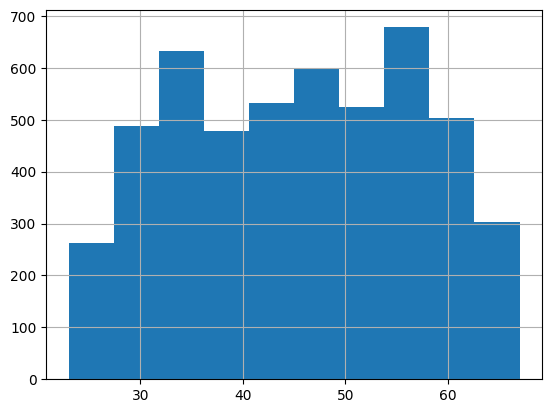

In [68]:
df_ordered['Age'].hist()

In [24]:
def cate(x) :
    
    if x < 25 : return 20
    if x < 30 : return 25
    if x < 35 : return 30
    if x < 40 : return 35
    if x < 45 : return 40
    if x < 50 : return 45
    if x < 55 : return 50
    if x < 60 : return 55
    if x < 65 : return 60
    else : return 65



df_ordered['Age_category'] = df_ordered['Age'].apply(lambda x : cate(x))

In [25]:
df_ordered.groupby('Age_category').mean()

Age  Experience     Income    Family     CCAvg   Mortgage  \
Age_category                                                                    
20            23.700000   -1.250000  72.125000  2.700000  2.173250  35.375000   
25            27.368304    2.256696  79.841518  2.667411  1.922835  62.151786   
30            31.985827    6.757480  74.278740  2.388976  2.086866  57.355906   
35            36.954248   11.673203  75.475490  2.478758  2.005458  57.709150   
40            42.007610   17.013699  76.464231  2.292237  2.033760  55.277017   
45            46.945000   21.753333  76.736667  2.283333  2.097100  55.450000   
50            51.989505   26.623688  70.754123  2.293853  1.744648  60.187406   
55            57.032984   31.625187  67.902549  2.482759  1.844723  52.706147   
60            61.799283   36.517921  70.222222  2.329749  1.791649  56.448029   
65            65.413793   40.241379  76.827586  2.439655  1.728793  44.060345   

                  ZIP Code  Education  Securities Account  CD Account  \
Age_category                                                            
20            92848.950000   1.675000            0.150000    0.000000   
25            93272.185268   1.863839            0.084821    0.040179   
30            93272.327559   1.801575            0.105512    0.080315   
35            93245.482026   1.883987            0.116013    0.053922   
40            93141.150685   1.910198            0.115677    0.060883   
45            93179.935000   1.795000            0.096667    0.075000   
50            92947.187406   1.971514            0.092954    0.046477   
55            93127.200900   1.869565            0.109445    0.061469   
60            93100.618280   1.940860            0.105735    0.051971   
65            93146.517241   1.974138            0.103448    0.120690   

                Online  CreditCard  Personal Loan  ZIP Code 00  
Age_category                                                    
20            0.650000    0.175000       0.000000    28.125000  
25            0.560268    0.308036       0.109375    32.388393  
30            0.623622    0.297638       0.108661    32.401575  
35            0.580065    0.285948       0.094771    32.119281  
40            0.569254    0.267884       0.089802    31.085236  
45            0.596667    0.315000       0.096667    31.465000  
50            0.616192    0.293853       0.095952    30.400300  
55            0.601199    0.299850       0.080960    30.934033  
60            0.621864    0.275986       0.098566    30.684588  
65            0.560345    0.396552       0.120690    31.155172

In [60]:
960 / 2

480.0

In [61]:
df_ordered.groupby('Age_category').mean()

Age  Experience     Income    Family      CCAvg  \
Age_category                                                          
20            23.700000    1.750000  72.125000  2.700000  26.079000   
25            27.368304    5.256696  79.841518  2.667411  23.074018   
30            31.985827    9.757480  74.278740  2.388976  25.042394   
35            36.954248   14.673203  75.475490  2.478758  24.065490   
40            42.007610   20.013699  76.464231  2.292237  24.405114   
45            46.945000   24.753333  76.736667  2.283333  25.165200   
50            51.989505   29.623688  70.754123  2.293853  20.935772   
55            57.032984   34.625187  67.902549  2.482759  22.136672   
60            61.799283   39.517921  70.222222  2.329749  21.499785   
65            65.413793   43.241379  76.827586  2.439655  20.745517   

               Mortgage      ZIP Code  Education  Securities Account  \
Age_category                                                           
20            35.375000  92848.950000   1.675000            0.150000   
25            62.151786  93272.185268   1.863839            0.084821   
30            57.355906  93272.327559   1.801575            0.105512   
35            57.709150  93245.482026   1.883987            0.116013   
40            55.277017  93141.150685   1.910198            0.115677   
45            55.450000  93179.935000   1.795000            0.096667   
50            60.187406  93072.769115   1.971514            0.092954   
55            52.706147  93127.200900   1.869565            0.109445   
60            56.448029  93100.618280   1.940860            0.105735   
65            44.060345  93146.517241   1.974138            0.103448   

              CD Account    Online  CreditCard  Personal Loan  
Age_category                                                   
20              0.000000  0.650000    0.175000       0.000000  
25              0.040179  0.560268    0.308036       0.109375  
30              0.080315  0.623622    0.297638       0.108661  
35              0.053922  0.580065    0.285948       0.094771  
40              0.060883  0.569254    0.267884       0.089802  
45              0.075000  0.596667    0.315000       0.096667  
50              0.046477  0.616192    0.293853       0.095952  
55              0.061469  0.601199    0.299850       0.080960  
60              0.051971  0.621864    0.275986       0.098566  
65              0.120690  0.560345    0.396552       0.120690

In [62]:
df_ordered[df_ordered['Personal Loan'] == 1].groupby('Age_category').count()

Age  Experience  Income  Family  CCAvg  Mortgage  ZIP Code  \
Age_category                                                               
25             49          49      49      49     49        49        49   
30             69          69      69      69     69        69        69   
35             58          58      58      58     58        58        58   
40             59          59      59      59     59        59        59   
45             58          58      58      58     58        58        58   
50             64          64      64      64     64        64        64   
55             54          54      54      54     54        54        54   
60             55          55      55      55     55        55        55   
65             14          14      14      14     14        14        14   

              Education  Securities Account  CD Account  Online  CreditCard  \
Age_category                                                                  
25                   49                  49          49      49          49   
30                   69                  69          69      69          69   
35                   58                  58          58      58          58   
40                   59                  59          59      59          59   
45                   58                  58          58      58          58   
50                   64                  64          64      64          64   
55                   54                  54          54      54          54   
60                   55                  55          55      55          55   
65                   14                  14          14      14          14   

              Personal Loan  
Age_category                 
25                       49  
30                       69  
35                       58  
40                       59  
45                       58  
50                       64  
55                       54  
60                       55  
65                       14

In [63]:
df_ordered[df_ordered['Personal Loan'] == 0].groupby('Age_category').count() / (5000-480)

Age  Experience    Income    Family     CCAvg  Mortgage  \
Age_category                                                                 
20            0.008850    0.008850  0.008850  0.008850  0.008850  0.008850   
25            0.088274    0.088274  0.088274  0.088274  0.088274  0.088274   
30            0.125221    0.125221  0.125221  0.125221  0.125221  0.125221   
35            0.122566    0.122566  0.122566  0.122566  0.122566  0.122566   
40            0.132301    0.132301  0.132301  0.132301  0.132301  0.132301   
45            0.119912    0.119912  0.119912  0.119912  0.119912  0.119912   
50            0.133407    0.133407  0.133407  0.133407  0.133407  0.133407   
55            0.135619    0.135619  0.135619  0.135619  0.135619  0.135619   
60            0.111283    0.111283  0.111283  0.111283  0.111283  0.111283   
65            0.022566    0.022566  0.022566  0.022566  0.022566  0.022566   

              ZIP Code  Education  Securities Account  CD Account    Online  \
Age_category                                                                  
20            0.008850   0.008850            0.008850    0.008850  0.008850   
25            0.088274   0.088274            0.088274    0.088274  0.088274   
30            0.125221   0.125221            0.125221    0.125221  0.125221   
35            0.122566   0.122566            0.122566    0.122566  0.122566   
40            0.132301   0.132301            0.132301    0.132301  0.132301   
45            0.119912   0.119912            0.119912    0.119912  0.119912   
50            0.133407   0.133407            0.133407    0.133407  0.133407   
55            0.135619   0.135619            0.135619    0.135619  0.135619   
60            0.111283   0.111283            0.111283    0.111283  0.111283   
65            0.022566   0.022566            0.022566    0.022566  0.022566   

              CreditCard  Personal Loan  
Age_category                             
20              0.008850       0.008850  
25              0.088274       0.088274  
30              0.125221       0.125221  
35              0.122566       0.122566  
40              0.132301       0.132301  
45              0.119912       0.119912  
50              0.133407       0.133407  
55              0.135619       0.135619  
60              0.111283       0.111283  
65              0.022566       0.022566

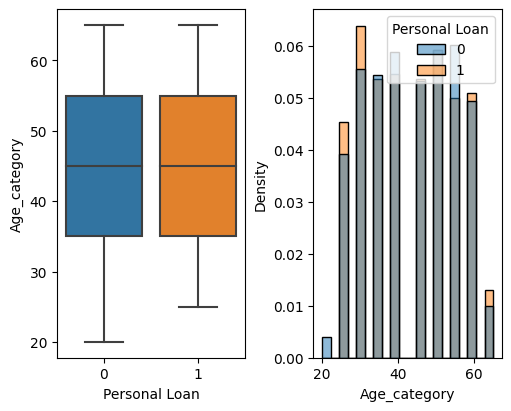

In [75]:
for col in ['Age_category'] :

    fig, axs = plt.subplots(figsize=(5,4), nrows=1, ncols=2,constrained_layout=True)

    sns.boxplot(data= df_ordered, y=col , x='Personal Loan', ax = axs[0])
    sns.histplot(data= df_ordered, x=col, hue="Personal Loan", stat="density", linewidth=1, common_norm=False, ax = axs[1])
    
    sns.move_legend(axs[1], "upper right")
    
    plt.show()

#### 이변량 분석(범주형 변수)

In [20]:
df_ordered['ZIP Code'].apply(lambda x : int(str(x)[1:3])).nunique()

57

In [21]:
df_ordered['ZIP Code 00'] = df_ordered['ZIP Code'].apply(lambda x : int(str(x)[1:3]))

In [22]:
df_ordered

Age  Experience  Income  Family  CCAvg  Mortgage  ZIP Code  Education  \
0      25           1      49       4    1.6         0     91107          1   
1      45          19      34       3    1.5         0     90089          1   
2      39          15      11       1    1.0         0     94720          1   
3      35           9     100       1    2.7         0     94112          2   
4      35           8      45       4    1.0         0     91330          2   
...   ...         ...     ...     ...    ...       ...       ...        ...   
4995   29           3      40       1    1.9         0     92697          3   
4996   30           4      15       4    0.4        85     92037          1   
4997   63          39      24       2    0.3         0     93023          3   
4998   65          40      49       3    0.5         0     90034          2   
4999   28           4      83       3    0.8         0     92612          1   

      Securities Account  CD Account  Online  CreditCard  Personal Loan  \
0                      1           0       0           0              0   
1                      1           0       0           0              0   
2                      0           0       0           0              0   
3                      0           0       0           0              0   
4                      0           0       0           1              0   
...                  ...         ...     ...         ...            ...   
4995                   0           0       1           0              0   
4996                   0           0       1           0              0   
4997                   0           0       0           0              0   
4998                   0           0       1           0              0   
4999                   0           0       1           1              0   

      ZIP Code 00  
0              11  
1               0  
2              47  
3              41  
4              13  
...           ...  
4995           26  
4996           20  
4997           30  
4998            0  
4999           26  

[5000 rows x 14 columns]

In [67]:
df_ordered['ZIP Code 00']

0       11
1        0
2       47
3       41
4       13
        ..
4995    26
4996    20
4997    30
4998     0
4999    26
Name: ZIP Code 00, Length: 5000, dtype: int64

In [68]:
df_ordered[['ZIP Code 00', 'Age_category', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]

ZIP Code 00  Age_category  Education  Securities Account  CD Account  \
0              11            25          1                   1           0   
1               0            45          1                   1           0   
2              47            35          1                   0           0   
3              41            35          2                   0           0   
4              13            35          2                   0           0   
...           ...           ...        ...                 ...         ...   
4995           26            25          3                   0           0   
4996           20            30          1                   0           0   
4997           30            60          3                   0           0   
4998            0            65          2                   0           0   
4999           26            25          1                   0           0   

      Online  CreditCard  
0          0           0  
1          0           0  
2          0           0  
3          0           0  
4          0           1  
...      ...         ...  
4995       1           0  
4996       1           0  
4997       0           0  
4998       1           0  
4999       1           1  

[5000 rows x 7 columns]

In [69]:
1 - df_ordered.mean()

Age                     -44.338400
Experience              -22.104600
Income                  -72.774200
Family                   -1.396400
CCAvg                   -22.255256
Mortgage                -55.498800
ZIP Code             -93168.255600
Education                -0.881000
Securities Account        0.895600
CD Account                0.939600
Online                    0.403200
CreditCard                0.706000
Personal Loan             0.904000
Age_category            -42.361000
ZIP Code 00             -30.363000
dtype: float64

In [82]:
df_ordered.groupby(by='Education').mean()

Age  Experience     Income    Family      CCAvg   Mortgage  \
Education                                                                     
1          44.963740   23.065363  85.586355  2.236164  27.129962  61.627385   
2          45.039914   22.770492  64.313614  2.652174  20.221069  51.319316   
3          46.140573   23.471686  66.122585  2.381079  20.680693  54.178548   

               ZIP Code  Securities Account  CD Account    Online  CreditCard  \
Education                                                                       
1          93147.202767            0.106870    0.056298  0.598760    0.302004   
2          93278.676408            0.106914    0.062723  0.612972    0.285103   
3          93097.773484            0.098601    0.063957  0.578947    0.291139   

           Personal Loan  Age_category  ZIP Code 00  
Education                                            
1               0.044370     42.989027    31.142653  
2               0.129722     43.086244    32.454740  
3               0.136576     44.137242    30.650233

<AxesSubplot:xlabel='Income', ylabel='Density'>

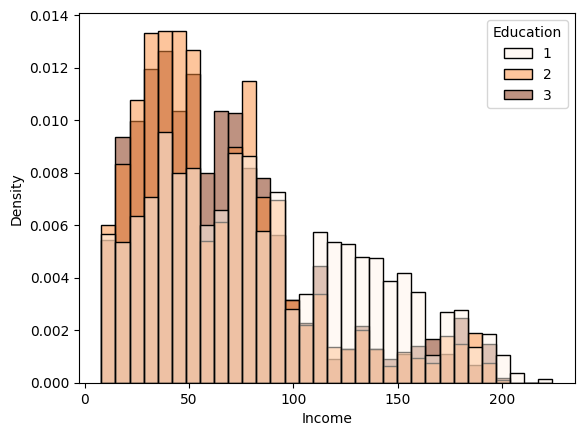

In [83]:
sns.histplot(df_ordered, x='Income',  hue='Education', stat="density", common_norm=False, palette="Oranges")

<AxesSubplot:xlabel='Income', ylabel='Density'>

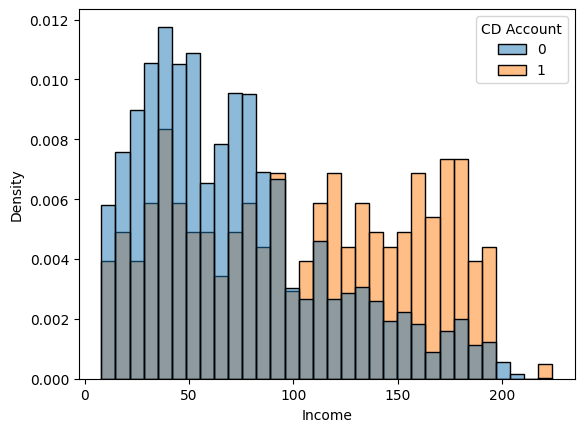

In [84]:
sns.histplot(df_ordered, x='Income',  hue='CD Account', stat="density",common_norm=False)

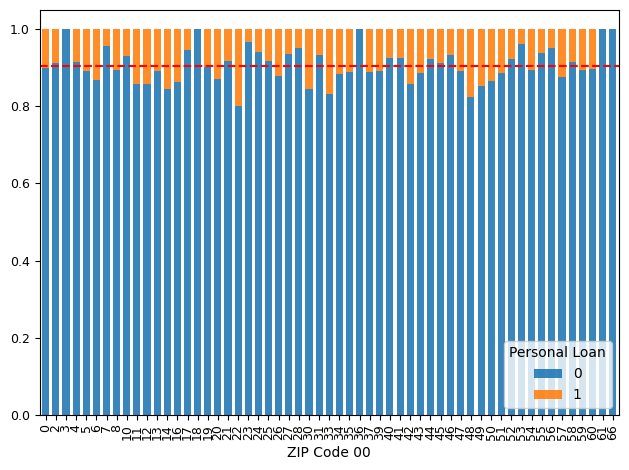

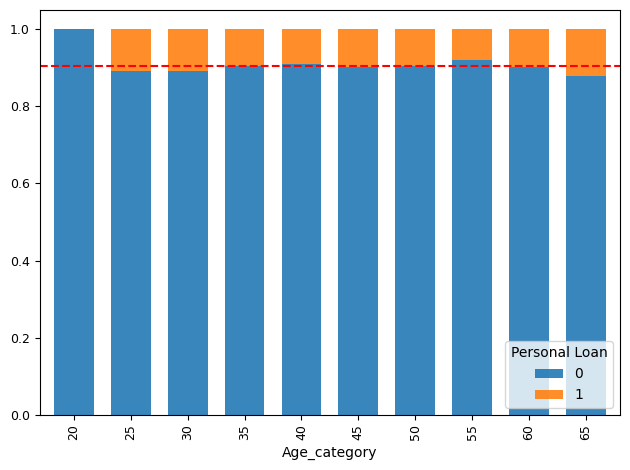

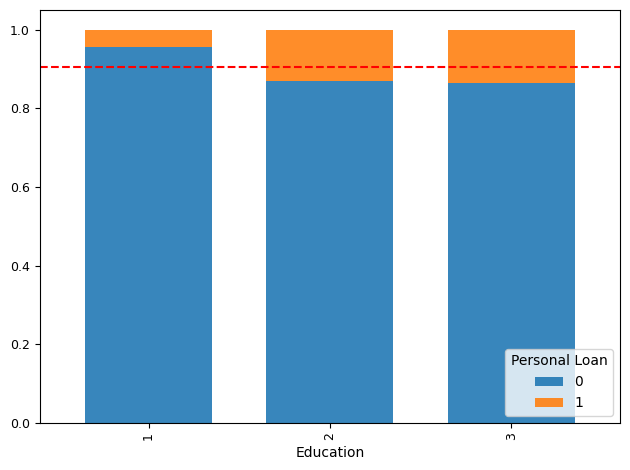

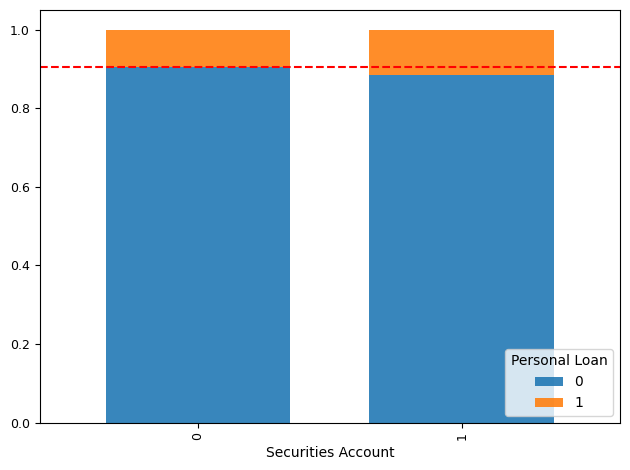

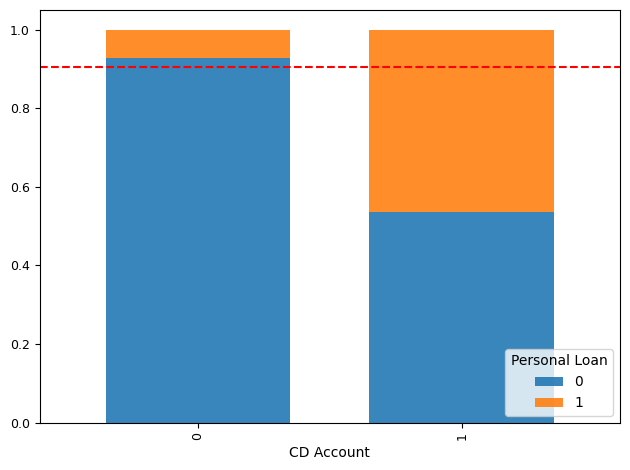

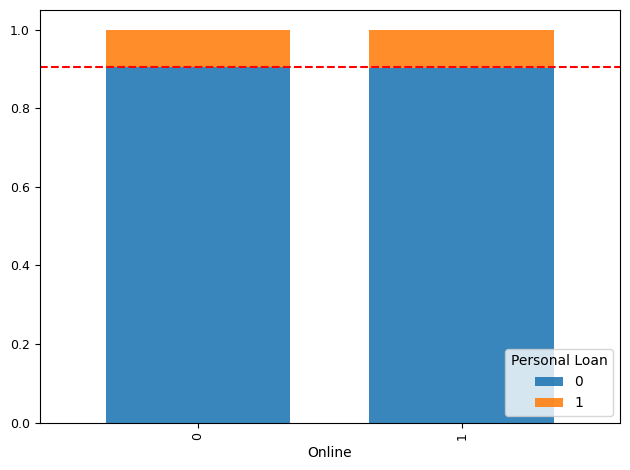

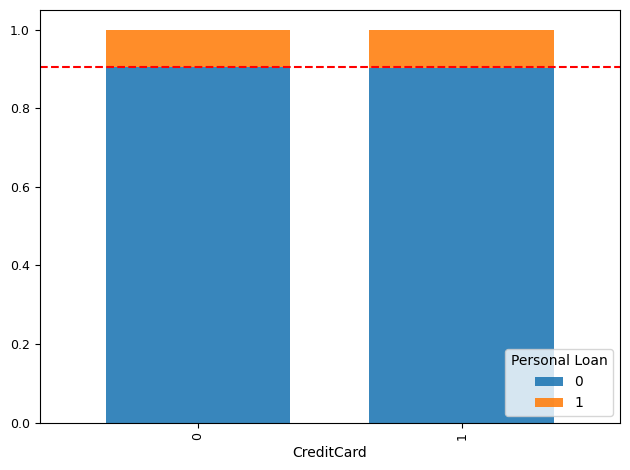

In [38]:
for col in ['ZIP Code 00', 'Age_category', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard'] :     
    
    x = pd.crosstab(index=df_ordered[col], columns=df_ordered['Personal Loan'],  normalize='index').plot.bar(stacked=True, width=0.7, fontsize=9, alpha=0.89)
    
    
    x.legend(title='Personal Loan',loc=4)  
    
    plt.axhline(0.904, 0, 1, color='red', linestyle='--', linewidth=1.5)
    plt.tight_layout()  
    plt.show()

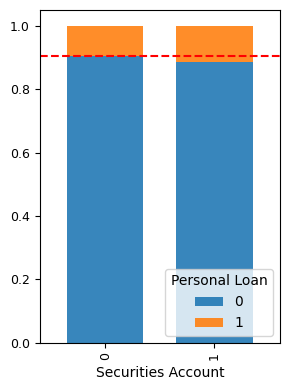

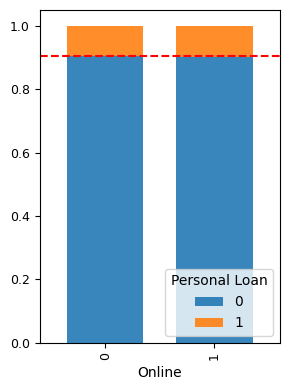

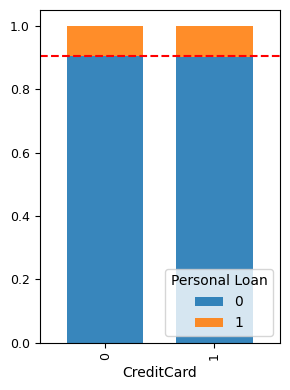

In [39]:
for col in ['Securities Account','Online', 'CreditCard'] :     

    x = pd.crosstab(index=df_ordered[col], columns=df_ordered['Personal Loan'],  normalize='index').plot.bar(stacked=True, width=0.7, fontsize=9, alpha=0.89, figsize=(3,4
))
    
    
    x.legend(title='Personal Loan',loc=4)  

    plt.axhline(0.904, 0, 1, color='red', linestyle='--', linewidth=1.5)
    plt.tight_layout()  

    plt.show()

In [23]:
df_ordered.groupby(by='CD Account').mean()[['Income','CCAvg','Mortgage', 'Securities Account']]

Income     CCAvg   Mortgage  Securities Account
CD Account                                                     
0            71.793316  1.877446  54.195828            0.079821
1           104.589404  2.878974  92.324503            0.486755

In [88]:
df_ordered.groupby(by='CD Account').count()

Age  Experience  Income  Family  CCAvg  Mortgage  ZIP Code  \
CD Account                                                                
0           4698        4698    4698    4698   4698      4698      4698   
1            302         302     302     302    302       302       302   

            Education  Securities Account  Online  CreditCard  Personal Loan  \
CD Account                                                                     
0                4698                4698    4698        4698           4698   
1                 302                 302     302         302            302   

            Age_category  ZIP Code 00  
CD Account                             
0                   4698         4698  
1                    302          302

In [89]:
df_ordered.groupby(by='Education').mean()

Age  Experience     Income    Family      CCAvg   Mortgage  \
Education                                                                     
1          44.963740   23.065363  85.586355  2.236164  27.129962  61.627385   
2          45.039914   22.770492  64.313614  2.652174  20.221069  51.319316   
3          46.140573   23.471686  66.122585  2.381079  20.680693  54.178548   

               ZIP Code  Securities Account  CD Account    Online  CreditCard  \
Education                                                                       
1          93147.202767            0.106870    0.056298  0.598760    0.302004   
2          93278.676408            0.106914    0.062723  0.612972    0.285103   
3          93097.773484            0.098601    0.063957  0.578947    0.291139   

           Personal Loan  Age_category  ZIP Code 00  
Education                                            
1               0.044370     42.989027    31.142653  
2               0.129722     43.086244    32.454740  
3               0.136576     44.137242    30.650233

In [90]:
df_ordered.groupby(by='Education').mean()[['Income','CCAvg','Mortgage']]

Income      CCAvg   Mortgage
Education                                 
1          85.586355  27.129962  61.627385
2          64.313614  20.221069  51.319316
3          66.122585  20.680693  54.178548

In [91]:
df_ordered.groupby(by='Education').count()

Age  Experience  Income  Family  CCAvg  Mortgage  ZIP Code  \
Education                                                                
1          2096        2096    2096    2096   2096      2096      2096   
2          1403        1403    1403    1403   1403      1403      1403   
3          1501        1501    1501    1501   1501      1501      1501   

           Securities Account  CD Account  Online  CreditCard  Personal Loan  \
Education                                                                      
1                        2096        2096    2096        2096           2096   
2                        1403        1403    1403        1403           1403   
3                        1501        1501    1501        1501           1501   

           Age_category  ZIP Code 00  
Education                             
1                  2096         2096  
2                  1403         1403  
3                  1501         1501

In [40]:
df_ordered.groupby(by='ZIP Code 00').count()

Age  Experience  Income  Family  CCAvg  Mortgage  ZIP Code  \
ZIP Code 00                                                               
0            375         375     375     375    375       375       375   
2            161         161     161     161    161       161       161   
3              2           2       2       2      2         2         2   
4             35          35      35      35     35        35        35   
5             28          28      28      28     28        28        28   
6             38          38      38      38     38        38        38   
7             45          45      45      45     45        45        45   
8             19          19      19      19     19        19        19   
10            29          29      29      29     29        29        29   
11            71          71      71      71     71        71        71   
12             7           7       7       7      7         7         7   
13           222         222     222     222    222       222       222   
14            13          13      13      13     13        13        13   
16            29          29      29      29     29        29        29   
17           150         150     150     150    150       150       150   
18             3           3       3       3      3         3         3   
19            41          41      41      41     41        41        41   
20           248         248     248     248    248       248       248   
21           279         279     279     279    279       279       279   
22            10          10      10      10     10        10        10   
23            60          60      60      60     60        60        60   
24            17          17      17      17     17        17        17   
25            49          49      49      49     49        49        49   
26           182         182     182     182    182       182       182   
27            62          62      62      62     62        62        62   
28            81          81      81      81     81        81        81   
30            58          58      58      58     58        58        58   
31           134         134     134     134    134       134       134   
33            18          18      18      18     18        18        18   
34            43          43      43      43     43        43        43   
35            36          36      36      36     36        36        36   
36             8           8       8       8      8         8         8   
37            18          18      18      18     18        18        18   
39           102         102     102     102    102       102       102   
40           242         242     242     242    242       242       242   
41           257         257     257     257    257       257       257   
42             7           7       7       7      7         7         7   
43           257         257     257     257    257       257       257   
44            13          13      13      13     13        13        13   
45           264         264     264     264    264       264       264   
46            89          89      89      89     89        89        89   
47           251         251     251     251    251       251       251   
48            17          17      17      17     17        17        17   
49            75          75      75      75     75        75        75   
50           267         267     267     267    267       267       267   
51            96          96      96      96     96        96        96   
52            13          13      13      13     13        13        13   
53            26          26      26      26     26        26        26   
54            19          19      19      19     19        19        19   
55            32          32      32      32     32        32        32   
56           162         162     162     162    162       162       162   
57            40          40      40  

In [93]:
df_ordered.groupby(by='ZIP Code 00').mean().sort_values(by='Personal Loan', ascending=False)

Age  Experience      Income    Family      CCAvg  \
ZIP Code 00                                                           
22           44.100000   22.000000   84.800000  2.100000  29.400000   
48           44.882353   22.470588   79.941176  2.294118  21.000000   
33           47.333333   25.333333   74.166667  2.333333  27.066667   
30           46.913793   24.655172   70.258621  2.448276  22.980000   
14           43.615385   21.538462   85.076923  2.230769  28.707692   
49           47.880000   25.706667   71.946667  2.520000  26.472000   
42           43.714286   20.142857   83.142857  2.428571  24.805714   
12           43.142857   20.857143   67.428571  1.285714  20.400000   
11           44.295775   21.802817   78.436620  2.267606  21.954930   
16           46.310345   24.137931   93.034483  2.206897  27.446897   
50           44.749064   22.483146   78.730337  2.307116  25.163596   
6            39.921053   17.736842   77.947368  2.157895  26.352632   
20           45.403226   23.108871   73.157258  2.483871  24.690484   
57           44.725000   22.575000   76.000000  2.525000  24.870000   
26           45.945055   23.796703   76.027473  2.593407  23.279341   
34           46.395349   24.325581   79.883721  2.232558  28.400930   
51           44.510417   22.270833   79.302083  2.614583  23.755000   
43           43.712062   21.583658   75.361868  2.424125  21.797510   
37           43.833333   21.722222   70.333333  2.777778  19.666667   
35           43.638889   21.250000   69.861111  2.138889  20.523333   
13           46.090090   23.900901   76.171171  2.369369  24.821622   
39           45.676471   23.401961   76.284314  2.421569  24.497647   
47           45.023904   22.733068   72.151394  2.494024  21.545498   
5            43.642857   21.107143   73.214286  2.285714  21.214286   
54           44.842105   22.631579   77.421053  2.210526  24.884211   
8            47.052632   24.210526   68.052632  2.210526  21.000000   
59           47.947368   25.368421   71.789474  2.315789  25.244211   
60           44.241379   22.103448   69.241379  2.827586  24.442759   
0            46.146667   23.917333   75.906667  2.410667  23.024000   
19           43.317073   21.268293   80.634146  2.292683  28.779512   
45           44.155303   21.924242   75.594697  2.435606  25.409091   
2            46.229814   24.055901   82.322981  2.285714  23.838261   
4            46.628571   24.428571   64.628571  2.485714  21.222857   
58           44.716312   22.539007   69.219858  2.319149  21.967660   
21           45.415771   23.197133   72.057348  2.419355  22.462366   
25           46.714286   24.571429   62.918367  2.428571  20.091429   
44           47.846154   25.846154   70.307692  2.615385  15.295385   
52           44.384615   21.923077   68.846154  2.461538  17.160000   
40           44.884298   22.623967   72.991736  2.371901  23.938512   
41           46.583658   24.311284   68.824903  2.435798  22.531051   
10           44.586207   21.931034   73.137931  2.310345  25.675862   
46           47.213483   25.033708   69.606742  2.438202  22.326742   
31           46.052239   23.738806   71.343284  2.231343  22.626269   
27           46.516129   24.354839   83.322581  2.112903  26.897419   
55           44.500000   22.531250   66.093750  2.531250  21.371250   
24           46.294118   24.000000   84.705882  2.117647  23.414118   
17           46.326667   24.140000   68.320000  2.406667  21.456000   
56           44.629630   22.320988   64.277778  2.537037  20.082222   
28           44.456790   22.148148   67.246914  2.320988  22.149630   
7            45.800000   23.733333   68.866667  2.200000  23.040000   
53           41.923077   19.692308   63.230769  2.269231  17.723077   
23           45.650000   23.616667   79.216667  2.150000  21.300000   
3            51.500000   29.000000   64.000000  2.500000  13.800000   
61           43.000000   21.200000   73.200000  1.800000   8.880000   
18           46.000000   23.000000  135.333

In [94]:
test = pd.crosstab(index=df_ordered['ZIP Code 00'], columns=df_ordered['Personal Loan'])

In [95]:
from scipy import stats 

for col in ['ZIP Code 00', 'Age_category', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard'] :     
    
    x = pd.crosstab(index=df_ordered[col], columns=df_ordered['Personal Loan'])
    
    _, pval, _, expected = stats.chi2_contingency(x)
    print(col, np.round(pval,3))

ZIP Code 00 0.743
Age_category 0.415
Education 0.0
Securities Account 0.141
CD Account 0.0
Online 0.693
CreditCard 0.884


#### 기타

In [96]:
df_ordered.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage',
       'ZIP Code', 'Education', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Personal Loan', 'Age_category', 'ZIP Code 00'],
      dtype='object')

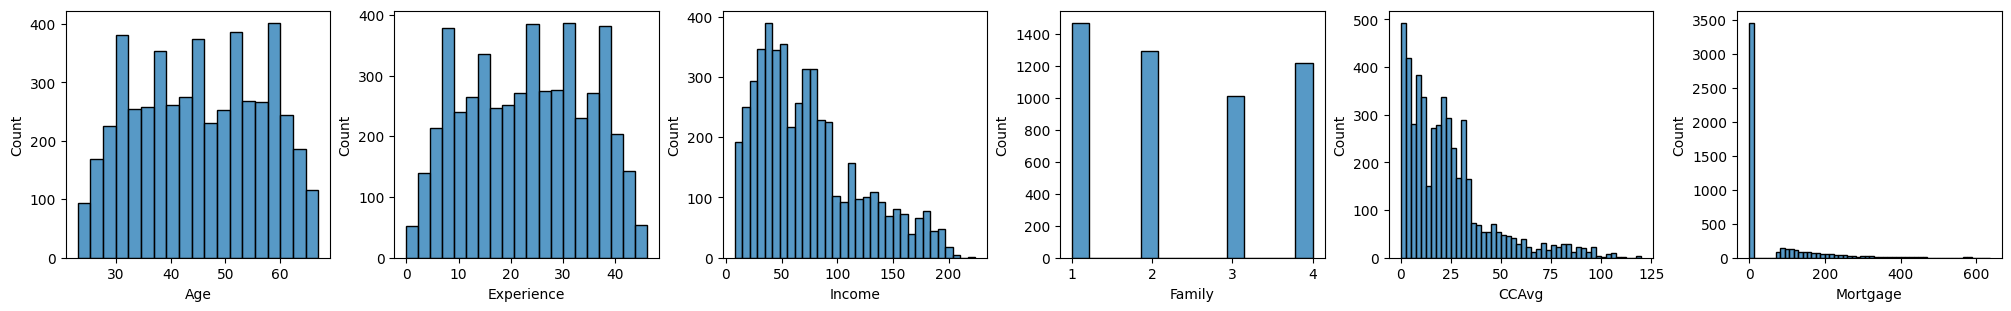

In [97]:
fig, axs = plt.subplots(figsize=(20,3), nrows=1, ncols=6, constrained_layout=True)

for ids ,col in enumerate(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']) :

    sns.histplot(data=df_ordered, x=col, linewidth=1, ax = axs[ids])


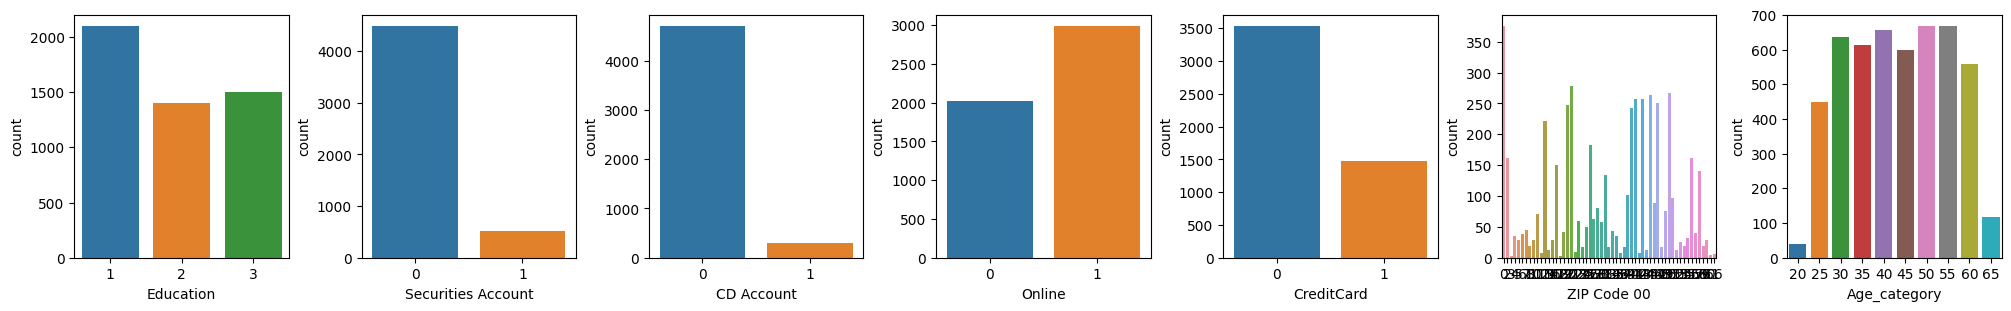

In [98]:
fig, axs = plt.subplots(figsize=(20,3), nrows=1, ncols=7, constrained_layout=True)

for ids ,col in enumerate(['Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'ZIP Code 00', 'Age_category']) :

    sns.countplot(data=df_ordered, x=col, linewidth=1, ax = axs[ids])

In [70]:
df_ordered['Securities Account'].value_counts(normalize=True)

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

### DT

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=3)

In [100]:
X = df_ordered.drop(columns='Personal Loan')

In [101]:
y = df_ordered['Personal Loan']

In [102]:
scores = cross_val_score(dt_clf , X , y , scoring='accuracy', cv=5)

In [103]:
scores

array([0.984, 0.983, 0.982, 0.982, 0.984])

In [91]:
from sklearn.model_selection import StratifiedKFold

In [104]:
skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [105]:
from sklearn.base import clone
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

score_a = []
score_f = []
score_r = []

for train_index, test_index in skfolds.split(X, y): 
    
    
        clone_clf = clone(dt_clf)
        X_train_folds = X.iloc[train_index]
        y_train_folds = y.iloc[train_index]
        X_test_fold = X.iloc[test_index]
        y_test_fold = y.iloc[test_index]
        
        
        clone_clf.fit(X_train_folds, y_train_folds)
        
        
        y_pred = clone_clf.predict(X_test_fold)
        n_correct = sum(y_pred == y_test_fold)
        f1 = f1_score(y_test_fold, y_pred) 
        
        score_a.append(n_correct / len(y_pred))
        score_f.append(f1)        

In [132]:
score_f

[0.8950276243093922,
 0.9222222222222222,
 0.896551724137931,
 0.8837209302325582,
 0.8786127167630057]

In [521]:
np.mean(score_a)

0.9815999999999999

In [522]:
np.mean(score_f)

0.8952270435330218

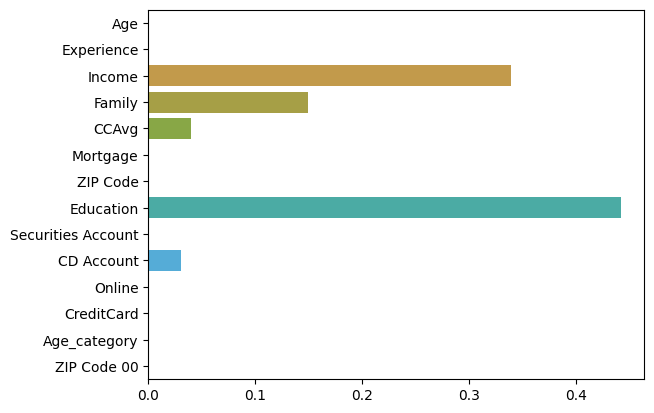

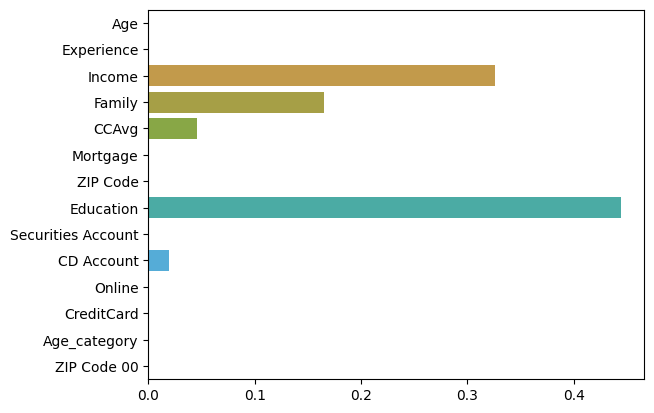

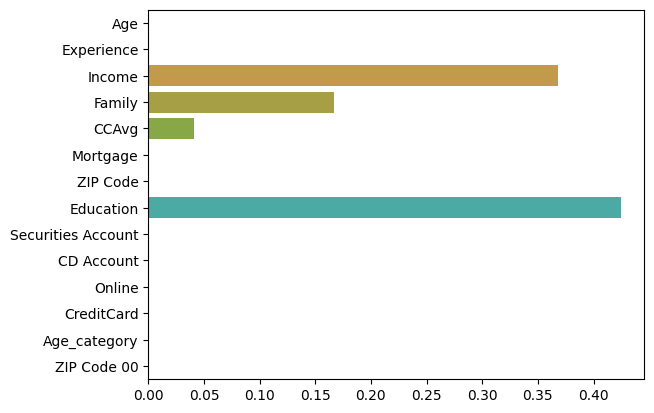

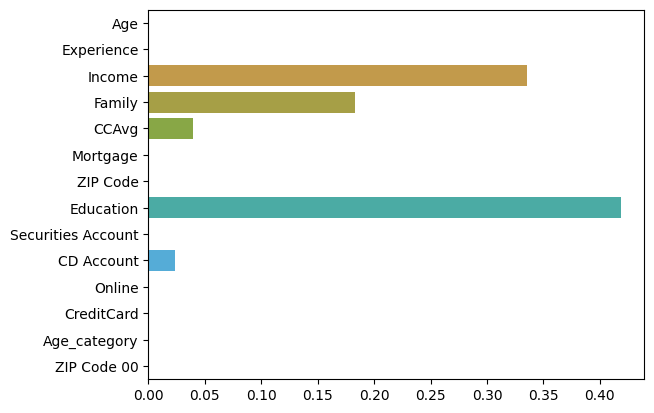

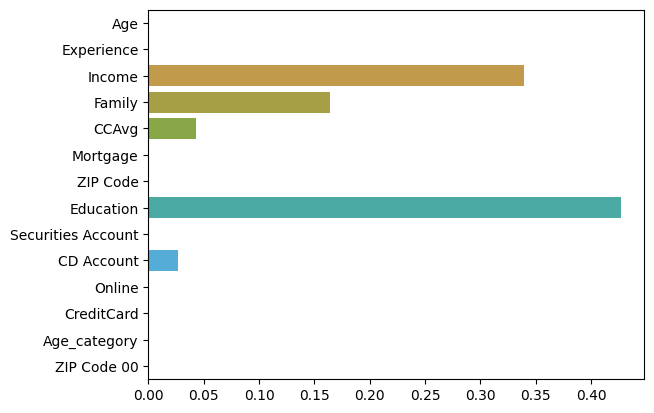

In [113]:
for train_index, test_index in skfolds.split(X, y): 
    
    
        clone_clf = clone(dt_clf)
        X_train_folds = X.iloc[train_index]
        y_train_folds = y.iloc[train_index]
        X_test_fold = X.iloc[test_index]
        y_test_fold = y.iloc[test_index]
        
        
        clone_clf.fit(X_train_folds, y_train_folds)
        
        sns.barplot(x=clone_clf.feature_importances_ , y=X_train_folds.columns)
        plt.show()

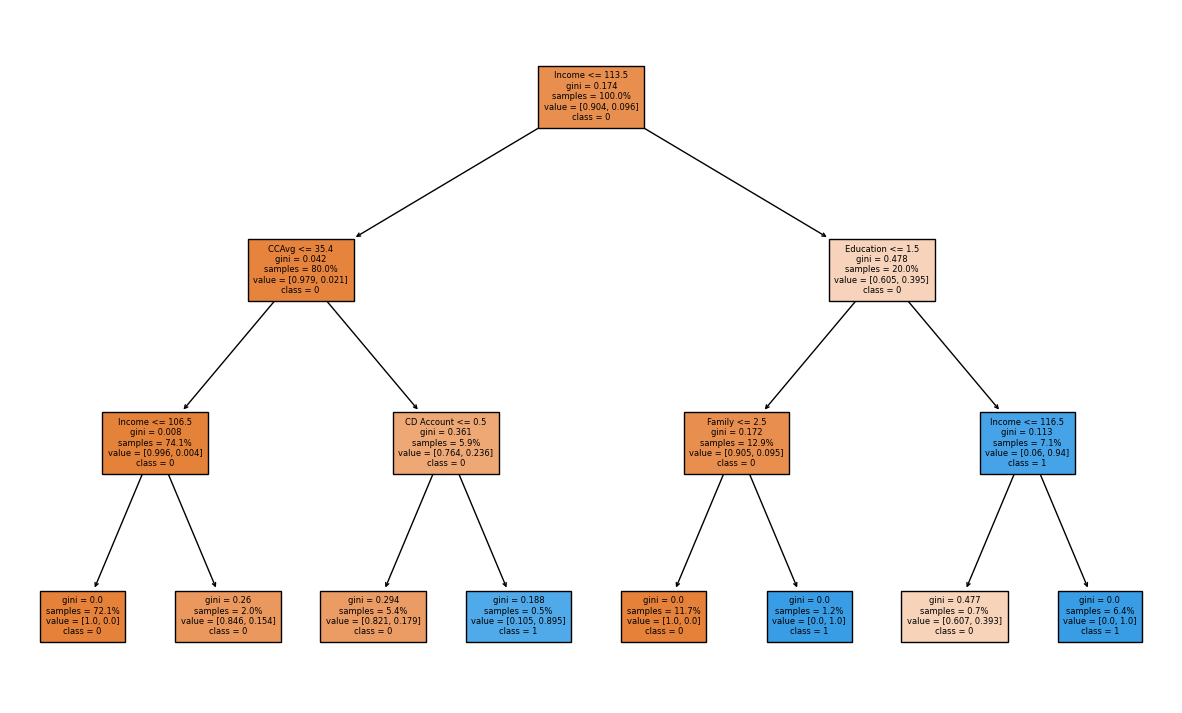

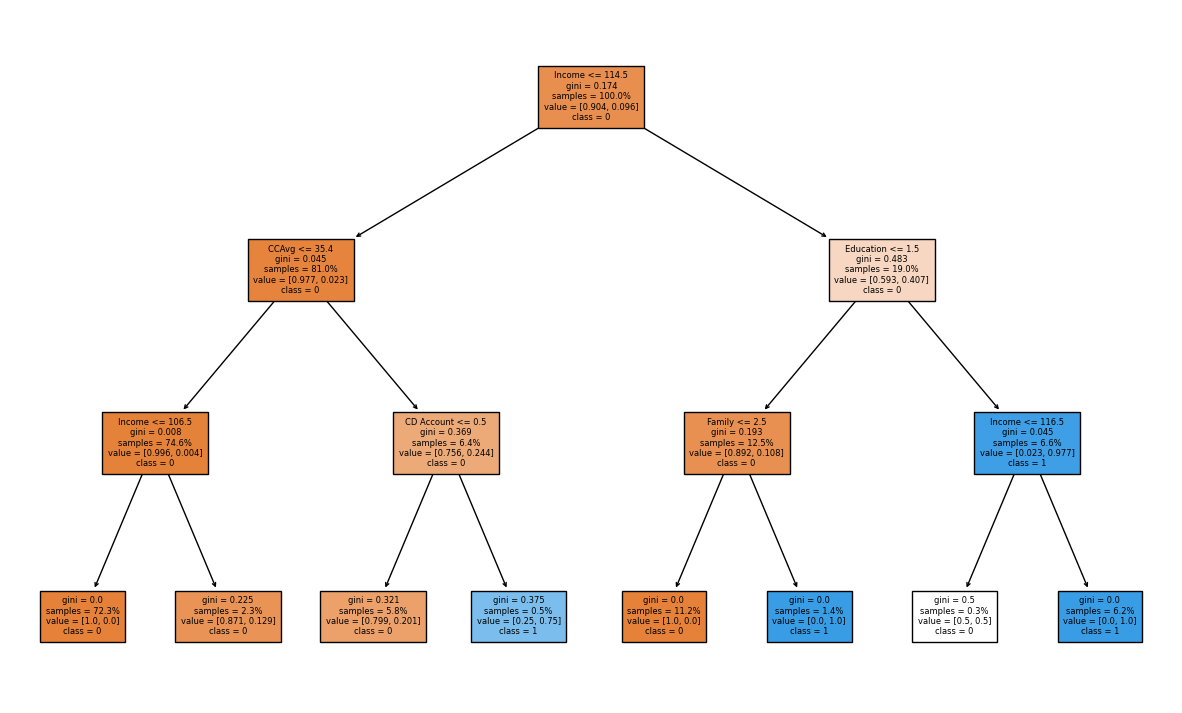

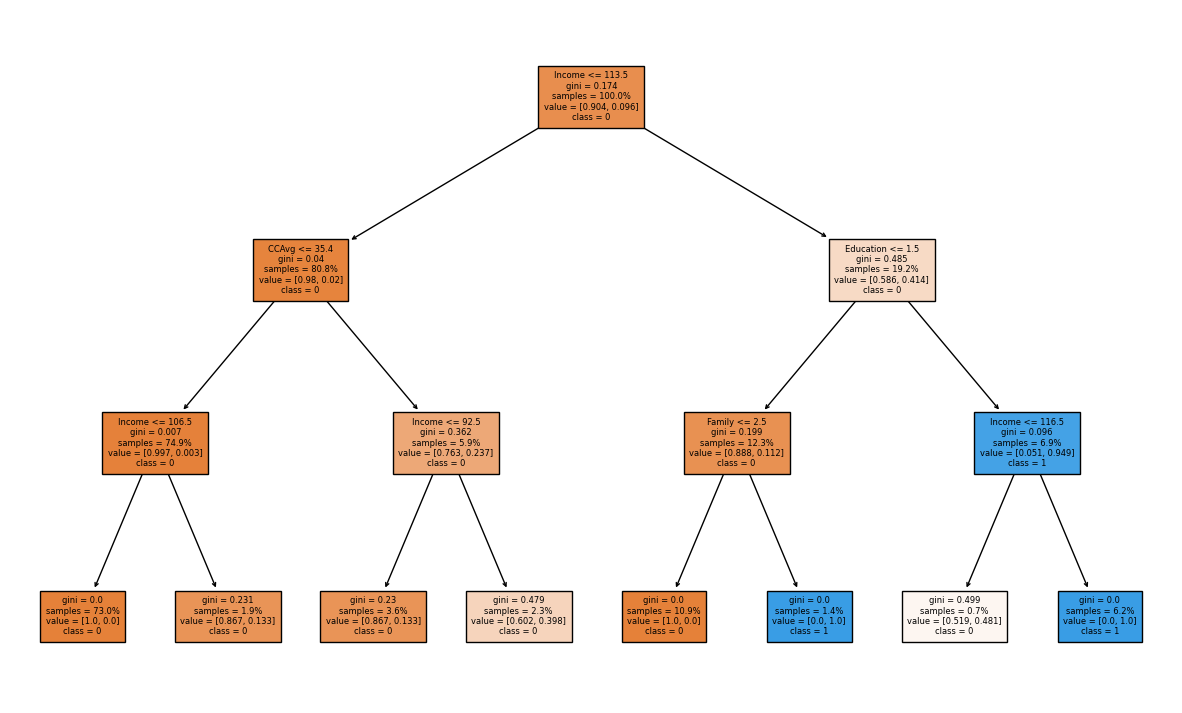

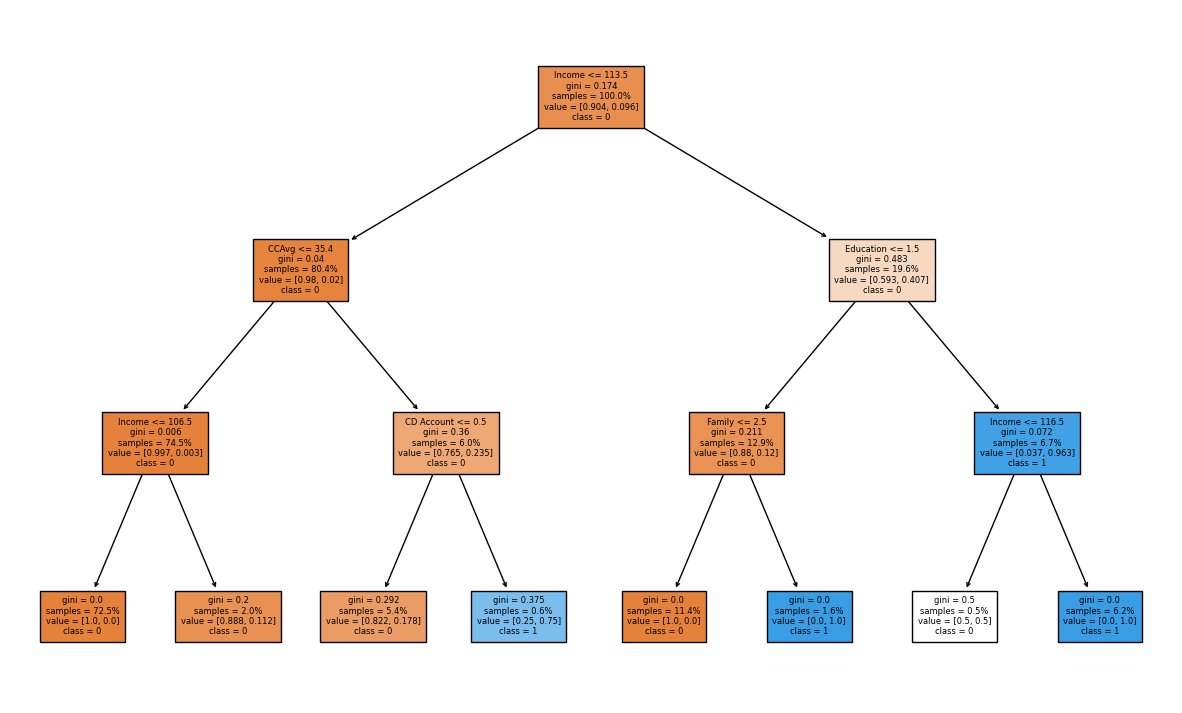

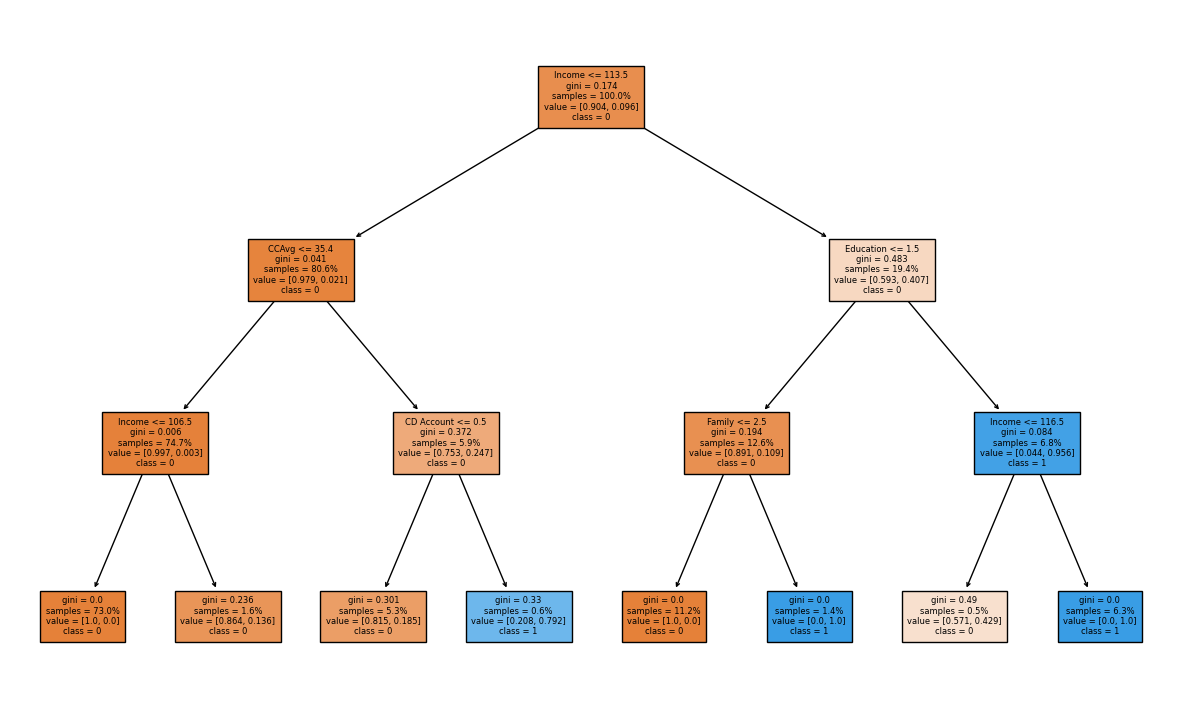

In [129]:
from sklearn.base import clone
from sklearn.tree import DecisionTreeClassifier, plot_tree

    
    
for train_index, test_index in skfolds.split(X, y): 
    
    
        clone_clf = clone(dt_clf)
        X_train_folds = X.iloc[train_index]
        y_train_folds = y.iloc[train_index]
        X_test_fold = X.iloc[test_index]
        y_test_fold = y.iloc[test_index]
        
        
        clone_clf.fit(X_train_folds, y_train_folds)
        
        plt.figure(figsize=(15, 9))
        # plot_tree(clone_clf, filled=True, impurity=True)
        plot_tree(clone_clf, class_names = ['0','1'], feature_names = df_ordered.columns, filled=True, impurity=True, \
                  proportion=True, fontsize=6)
        plt.show()

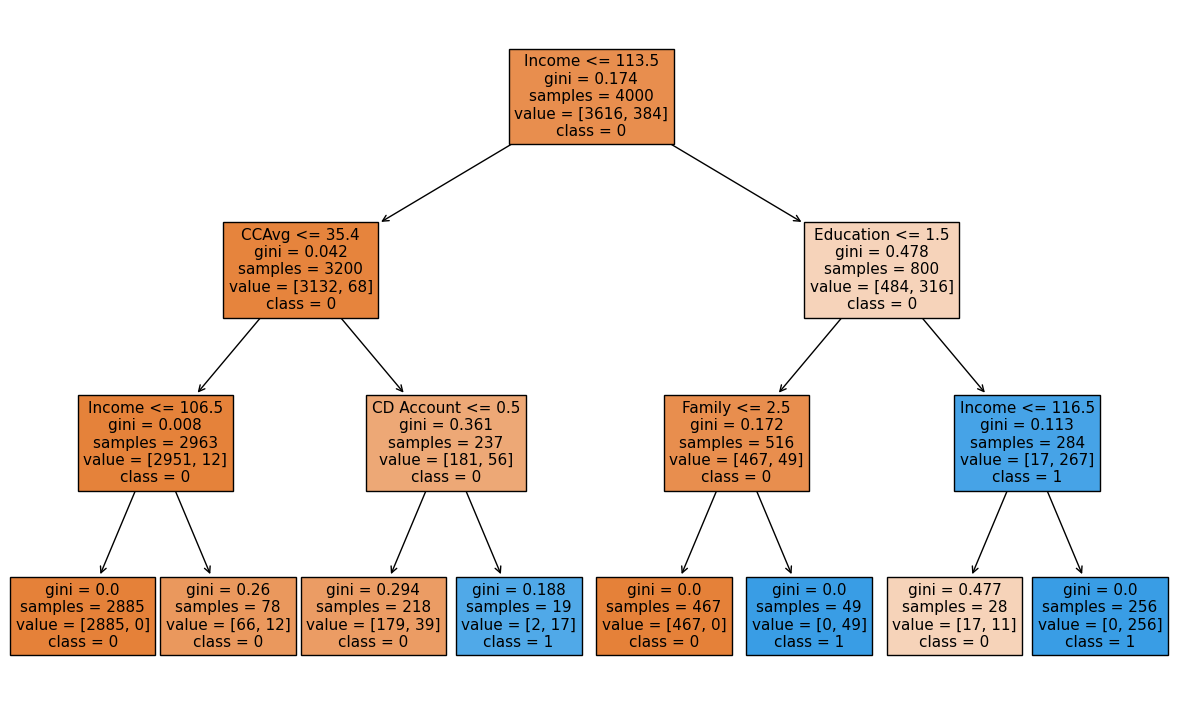

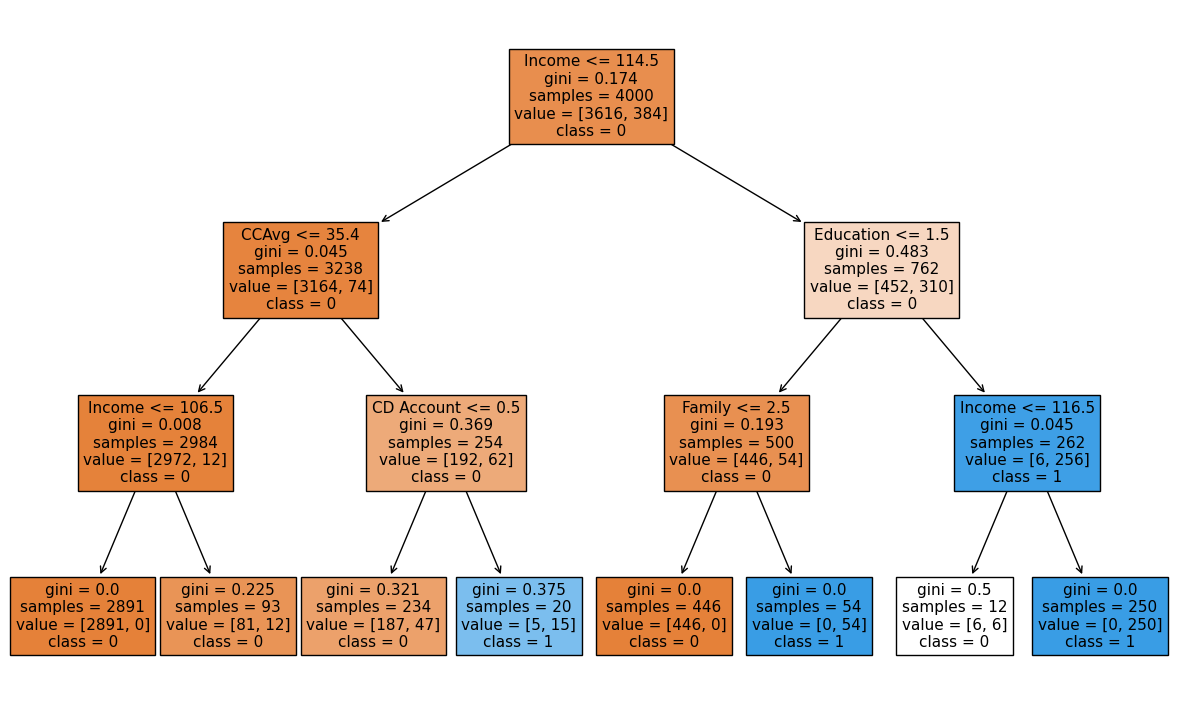

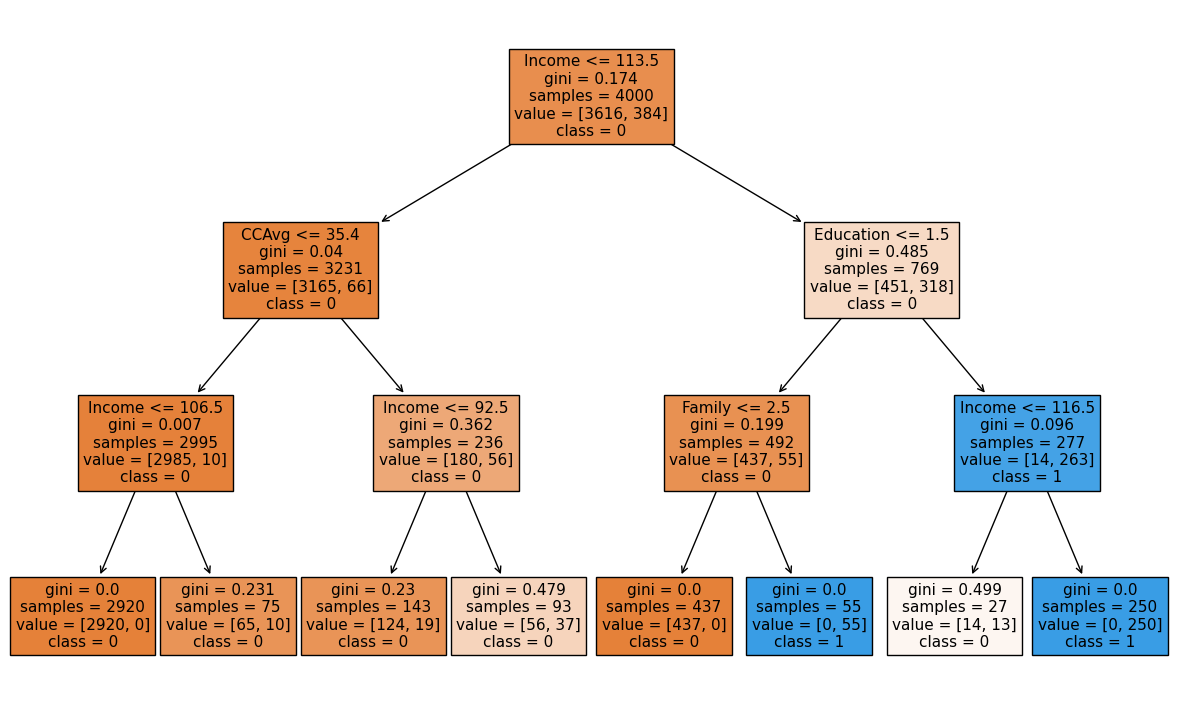

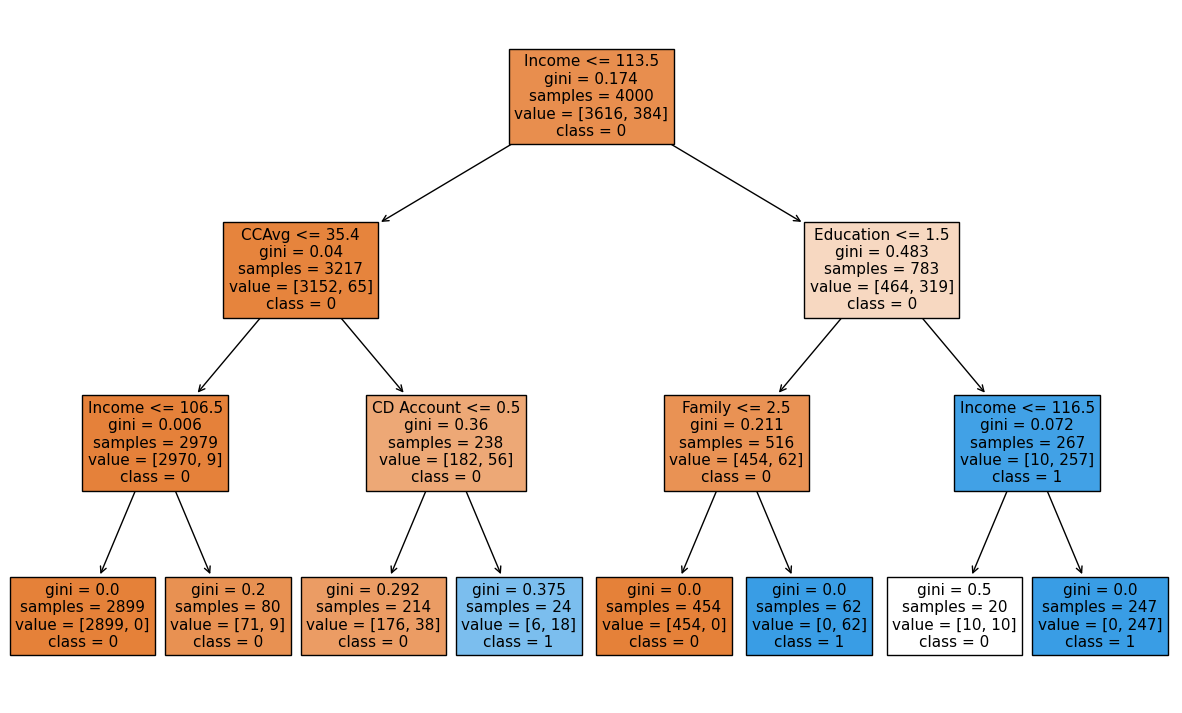

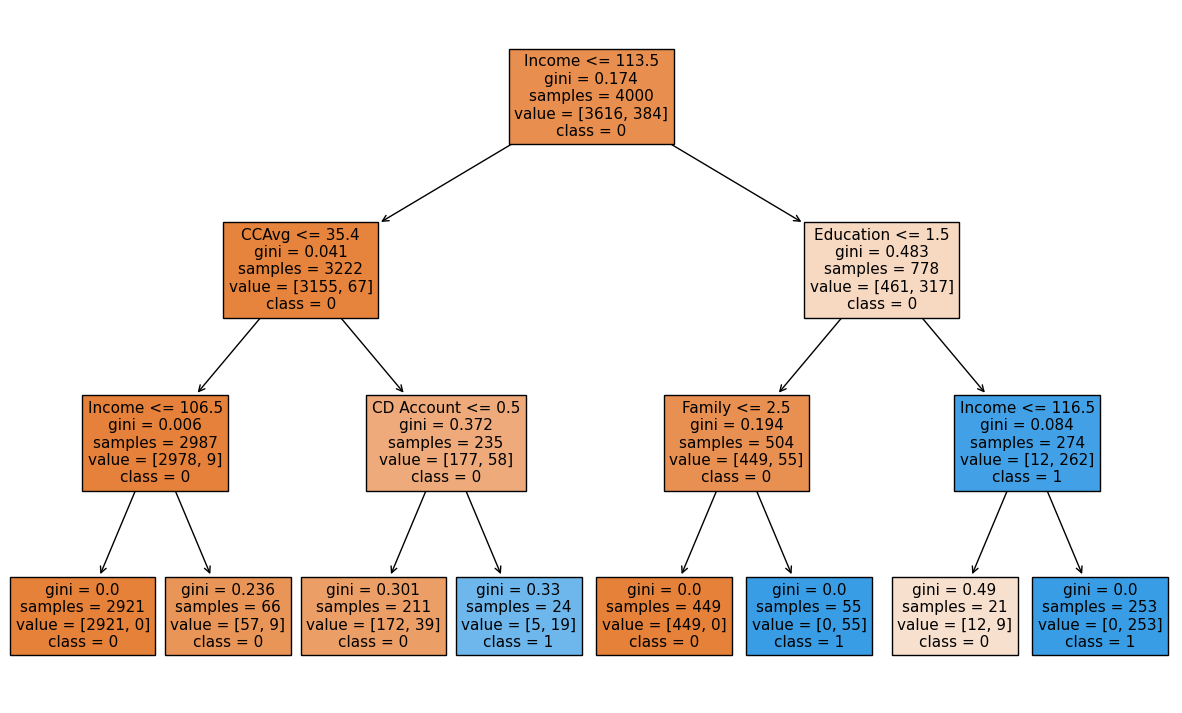

In [70]:
from sklearn.base import clone
from sklearn.tree import DecisionTreeClassifier, plot_tree

    
    
for train_index, test_index in skfolds.split(X, y): 
    
    
        clone_clf = clone(dt_clf)
        X_train_folds = X.iloc[train_index]
        y_train_folds = y.iloc[train_index]
        X_test_fold = X.iloc[test_index]
        y_test_fold = y.iloc[test_index]
        
        
        clone_clf.fit(X_train_folds, y_train_folds)
        
        plt.figure(figsize=(15, 9))
        # plot_tree(clone_clf, filled=True, impurity=True)
        plot_tree(clone_clf, class_names = ['0','1'], feature_names = df_ordered.columns, filled=True, impurity=True, \
                  proportion=False, fontsize=11)
        plt.show()



        
        '''
        y_pred = clone_clf.predict(X_test_fold)
        n_correct = sum(y_pred == y_test_fold)
        print(n_correct / len(y_pred))
        '''

### 모델 구현

In [436]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score



# 분류모델 평가 함수 정의
def get_clf_eval(y_test, pred, pred_proba):

    accuracy = accuracy_score(y_test , pred)      # 정확도
    f1 = f1_score(y_test,pred)
    
    precision = precision_score(y_test , pred)    # 정밀도
    recall = recall_score(y_test , pred)          # 재현율
    
                    
    roc_auc = roc_auc_score(y_test, pred_proba)   # auc 스코어
    

    return accuracy, f1, roc_auc, precision, recall

In [73]:
'''
# 함수 사용
pred = lgbm_clf.predict(X_test)
pred_proba = lgbm_clf.predict_proba(X_test)[:,1]  # Positive 확률

get_clf_eval(y_test, pred, pred_proba)
'''

'\n# 함수 사용\npred = lgbm_clf.predict(X_test)\npred_proba = lgbm_clf.predict_proba(X_test)[:,1]  # Positive 확률\n\nget_clf_eval(y_test, pred, pred_proba)\n'

In [88]:
X = df_ordered.drop(columns='Personal Loan')
y = df_ordered['Personal Loan']

#### 트리

In [218]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier()

# 하이퍼파리미터 조합 - dict 형태로 입력 : { 'parameter_Name' : [ ] }
parameters = {'max_depth':[3,4,5,6,7]}

# GridSearchCV 설정    # estimator  # 튜닝할 파라미터  # 폴드수   # 성능평가지표    # 학습여부 
grid_dtree =GridSearchCV(dtree, param_grid=parameters, cv=5, scoring=['f1', 'roc_auc','accuracy'], refit='f1')
# GridSearchCV 수행 : 학습데이터
grid_dtree.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7]}, refit='f1',
             scoring=['f1', 'roc_auc', 'accuracy'])

In [219]:
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_f1', 'std_test_f1', 'mean_test_roc_auc', 'std_test_roc_auc', 'mean_test_accuracy','std_test_accuracy']]

params  mean_test_f1  std_test_f1  mean_test_roc_auc  \
0  {'max_depth': 3}      0.905056     0.004178           0.992840   
1  {'max_depth': 4}      0.905945     0.014343           0.992741   
2  {'max_depth': 5}      0.917926     0.017152           0.986977   
3  {'max_depth': 6}      0.908037     0.014350           0.978228   
4  {'max_depth': 7}      0.909076     0.009045           0.967258   

   std_test_roc_auc  mean_test_accuracy  std_test_accuracy  
0          0.003870              0.9830           0.000894  
1          0.004134              0.9830           0.002449  
2          0.006028              0.9848           0.002786  
3          0.009311              0.9824           0.003072  
4          0.002500              0.9828           0.001720

In [111]:
scores_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_f1', 'split1_test_f1',
       'split2_test_f1', 'split3_test_f1', 'split4_test_f1', 'mean_test_f1',
       'std_test_f1', 'rank_test_f1', 'split0_test_roc_auc',
       'split1_test_roc_auc', 'split2_test_roc_auc', 'split3_test_roc_auc',
       'split4_test_roc_auc', 'mean_test_roc_auc', 'std_test_roc_auc',
       'rank_test_roc_auc', 'split0_test_accuracy', 'split1_test_accuracy',
       'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy',
       'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy'],
      dtype='object')

In [220]:
grid_dtree.best_params_

{'max_depth': 5}

In [221]:
grid_dtree.best_estimator_.feature_importances_

array([0.00419198, 0.        , 0.33158422, 0.15844541, 0.05022155,
       0.        , 0.        , 0.42641868, 0.        , 0.02043796,
       0.00261013, 0.00220859, 0.00388148, 0.        ])

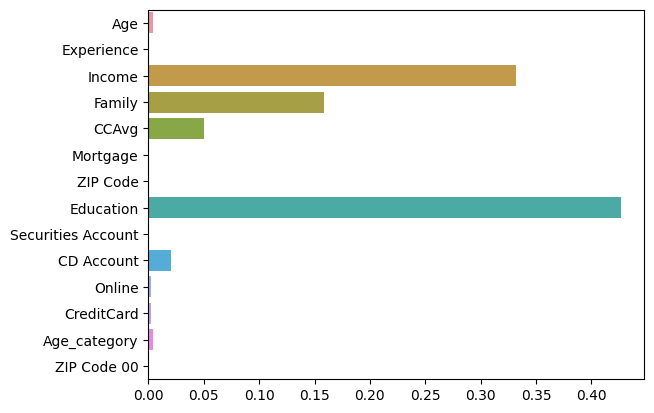

In [222]:
sns.barplot(x=grid_dtree.best_estimator_.feature_importances_ , y=X.columns)
plt.show()

#### 랜덤포레스트

In [270]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

# 하이퍼파리미터 조합 - dict 형태로 입력 : { 'parameter_Name' : [ ] }
parameters = {'n_estimators' : [100,200,500]}

# GridSearchCV 설정    # estimator  # 튜닝할 파라미터  # 폴드수   # 성능평가지표    # 학습여부 
grid_RF = GridSearchCV(RF, param_grid=parameters, cv=5, scoring=['f1', 'roc_auc','accuracy'], refit='f1')
# GridSearchCV 수행 : 학습데이터
grid_RF.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 200, 500]}, refit='f1',
             scoring=['f1', 'roc_auc', 'accuracy'])

In [271]:
scores_df = pd.DataFrame(grid_RF.cv_results_)
scores_df[['params','mean_test_f1', 'std_test_f1', 'mean_test_roc_auc', 'std_test_roc_auc', 'mean_test_accuracy','std_test_accuracy']]

params  mean_test_f1  std_test_f1  mean_test_roc_auc  \
0  {'n_estimators': 100}      0.924478     0.010046           0.996740   
1  {'n_estimators': 200}      0.923666     0.012286           0.996327   
2  {'n_estimators': 500}      0.930631     0.008657           0.997081   

   std_test_roc_auc  mean_test_accuracy  std_test_accuracy  
0          0.001688              0.9864           0.001625  
1          0.002412              0.9862           0.002135  
2          0.001443              0.9874           0.001497

In [272]:
grid_RF.best_params_ # 0.933064

{'n_estimators': 500}

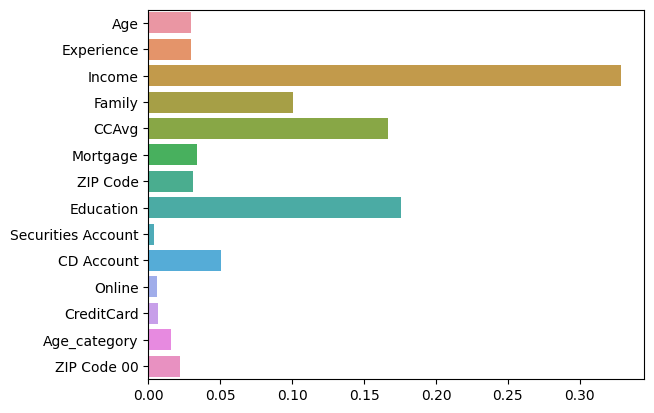

In [273]:
sns.barplot(x=grid_RF.best_estimator_.feature_importances_ , y=X.columns)
plt.show()

#### 부스팅

In [284]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier()

# 하이퍼파리미터 조합 - dict 형태로 입력 : { 'parameter_Name' : [ ] }
parameters = {'n_estimators' : [100,200,500]}

# GridSearchCV 설정    # estimator  # 튜닝할 파라미터  # 폴드수   # 성능평가지표    # 학습여부 
grid_GB = GridSearchCV(GB, param_grid=parameters, cv=5, scoring=['f1', 'roc_auc','accuracy'], refit='f1')
# GridSearchCV 수행 : 학습데이터
grid_GB.fit(X, y)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [100, 200, 500]}, refit='f1',
             scoring=['f1', 'roc_auc', 'accuracy'])

In [285]:
scores_df = pd.DataFrame(grid_GB.cv_results_)
scores_df[['params','mean_test_f1', 'std_test_f1', 'mean_test_roc_auc', 'std_test_roc_auc', 'mean_test_accuracy','std_test_accuracy']]

params  mean_test_f1  std_test_f1  mean_test_roc_auc  \
0  {'n_estimators': 100}      0.919413     0.017421           0.997615   
1  {'n_estimators': 200}      0.925462     0.007833           0.997684   
2  {'n_estimators': 500}      0.928783     0.015174           0.997320   

   std_test_roc_auc  mean_test_accuracy  std_test_accuracy  
0          0.000528              0.9850           0.003406  
1          0.000540              0.9860           0.001673  
2          0.001091              0.9866           0.002871

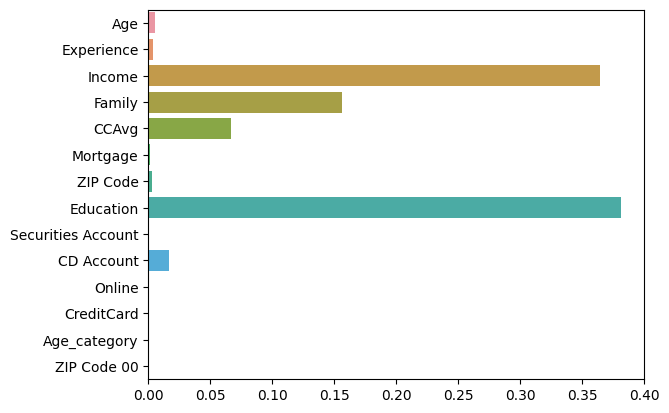

In [286]:
sns.barplot(x=grid_GB.best_estimator_.feature_importances_ , y=X.columns)
plt.show()

#### 로지스틱 회귀

In [356]:
X_lr = X.drop(columns=['Experience', 'ZIP Code', 'Age_category', 'ZIP Code 00'])

In [357]:
X_lr

Age  Income  Family  CCAvg  Mortgage  Education  Securities Account  \
0      25      49       4   19.2         0          1                   1   
1      45      34       3   18.0         0          1                   1   
2      39      11       1   12.0         0          1                   0   
3      35     100       1   32.4         0          2                   0   
4      35      45       4   12.0         0          2                   0   
...   ...     ...     ...    ...       ...        ...                 ...   
4995   29      40       1   22.8         0          3                   0   
4996   30      15       4    4.8        85          1                   0   
4997   63      24       2    3.6         0          3                   0   
4998   65      49       3    6.0         0          2                   0   
4999   28      83       3    9.6         0          1                   0   

      CD Account  Online  CreditCard  
0              0       0           0  
1              0       0           0  
2              0       0           0  
3              0       0           0  
4              0       0           1  
...          ...     ...         ...  
4995           0       1           0  
4996           0       1           0  
4997           0       0           0  
4998           0       1           0  
4999           0       1           1  

[5000 rows x 10 columns]

In [358]:
from sklearn.preprocessing import StandardScaler

# fit > transform 순서로 표준화 진행
scaler = StandardScaler()
scaler.fit(X_lr)                     # fit
X_lr_scaled = scaler.transform(X_lr) # transform > ndarray로 반환

In [469]:
A = pd.DataFrame(X_lr_scaled, columns=X_lr.columns)[['Age', 'Income', 'Family', 'CCAvg', 'Mortgage']]

In [470]:
A

Age    Income    Family     CCAvg  Mortgage
0    -1.774417 -0.538229  1.397414 -0.193385 -0.555524
1    -0.029524 -0.864109  0.525991 -0.250611 -0.555524
2    -0.552992 -1.363793 -1.216855 -0.536736 -0.555524
3    -0.901970  0.569765 -1.216855  0.436091 -0.555524
4    -0.901970 -0.625130  1.397414 -0.536736 -0.555524
...        ...       ...       ...       ...       ...
4995 -1.425438 -0.733757 -1.216855 -0.021710 -0.555524
4996 -1.338194 -1.276892  1.397414 -0.880087  0.280238
4997  1.540880 -1.081363 -0.345432 -0.937312 -0.555524
4998  1.715370 -0.538229  0.525991 -0.822862 -0.555524
4999 -1.512683  0.200434  0.525991 -0.651186 -0.555524

[5000 rows x 5 columns]

In [472]:
X_lr.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Education',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [475]:
B = X_lr[['Education',
       'Securities Account', 'CD Account', 'Online', 'CreditCard']]

In [478]:
X_lr_scaled_v2 = pd.concat([A, B], axis=1)

In [373]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='lbfgs')

# 하이퍼파리미터 조합 - dict 형태로 입력 : { 'parameter_Name' : [ ] }
parameters = {'penalty' : ['none'], 'max_iter':[10000]}

# GridSearchCV 설정    # estimator  # 튜닝할 파라미터  # 폴드수   # 성능평가지표    # 학습여부 
grid_lr =GridSearchCV(lr_clf, param_grid=parameters, cv=5, scoring=['f1', 'roc_auc','accuracy'], refit='f1')
# GridSearchCV 수행 : 학습데이터
grid_lr.fit(X_lr_scaled, y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [10000], 'penalty': ['none']}, refit='f1',
             scoring=['f1', 'roc_auc', 'accuracy'])

In [374]:
scores_df = pd.DataFrame(grid_lr.cv_results_)
scores_df[['params','mean_test_f1', 'std_test_f1', 'mean_test_roc_auc', 'std_test_roc_auc', 'mean_test_accuracy','std_test_accuracy']]

params  mean_test_f1  std_test_f1  \
0  {'max_iter': 10000, 'penalty': 'none'}      0.706276     0.024184   

   mean_test_roc_auc  std_test_roc_auc  mean_test_accuracy  std_test_accuracy  
0           0.957679          0.010437              0.9494           0.004499

In [486]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='lbfgs')

# 하이퍼파리미터 조합 - dict 형태로 입력 : { 'parameter_Name' : [ ] }
parameters = {'penalty' : ['none'], 'max_iter':[10000]}

# GridSearchCV 설정    # estimator  # 튜닝할 파라미터  # 폴드수   # 성능평가지표    # 학습여부 
grid_lr =GridSearchCV(lr_clf, param_grid=parameters, cv=5, scoring=['f1', 'roc_auc','accuracy'], refit='f1')
# GridSearchCV 수행 : 학습데이터
grid_lr.fit(X_lr_scaled_v2, y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [10000], 'penalty': ['none']}, refit='f1',
             scoring=['f1', 'roc_auc', 'accuracy'])

In [487]:
scores_df = pd.DataFrame(grid_lr.cv_results_)
scores_df[['params','mean_test_f1', 'std_test_f1', 'mean_test_roc_auc', 'std_test_roc_auc', 'mean_test_accuracy','std_test_accuracy']]

params  mean_test_f1  std_test_f1  \
0  {'max_iter': 10000, 'penalty': 'none'}      0.706276     0.024184   

   mean_test_roc_auc  std_test_roc_auc  mean_test_accuracy  std_test_accuracy  
0           0.957674          0.010435              0.9494           0.004499

In [375]:
pd.Series(data=grid_lr.best_estimator_.coef_[0] , index=X_lr.columns)

Age                   0.116674
Income                2.518049
Family                0.797879
CCAvg                 0.215717
Mortgage              0.046058
Education             1.440553
Securities Account   -0.284489
CD Account            0.912440
Online               -0.330499
CreditCard           -0.508958
dtype: float64

In [368]:
temp = pd.DataFrame(X_lr_scaled, columns=X_lr.columns)

df_train = pd.concat([temp, y], axis=1)

In [506]:
temp = pd.DataFrame(X_lr_scaled, columns=X_lr.columns)

df_train_v2 = pd.concat([X_lr_scaled_v2, y], axis=1)

In [377]:
df_train.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Education',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Personal Loan'],
      dtype='object')

In [378]:
df_train.columns = ['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Education',
       'Securities_Account', 'CD_Account', 'Online', 'CreditCard',
       'Personal_Loan']

<AxesSubplot:>

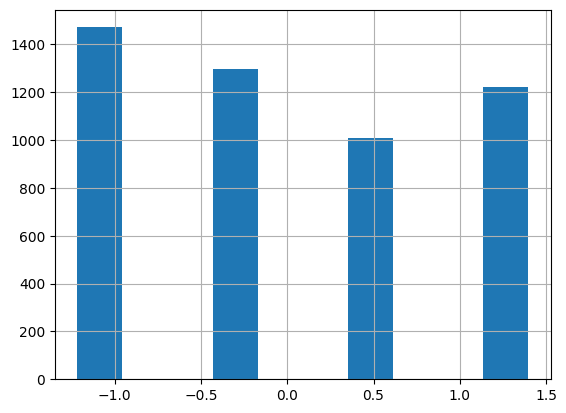

In [393]:
df_train['Family'].hist()

In [511]:
df_train_v2.loc[df_train_v2['Education'] == 3, 'Education'] = 2

df_train_v2.loc[df_train_v2['Education'] == 1, 'Education'] = 0
df_train_v2.loc[df_train_v2['Education'] == 2, 'Education'] = 1

In [512]:
df_train_v2['Education']

0       0
1       0
2       0
3       1
4       1
       ..
4995    1
4996    0
4997    1
4998    1
4999    0
Name: Education, Length: 5000, dtype: int64

In [513]:
df_train_v2.columns = ['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Education',
       'Securities_Account', 'CD_Account', 'Online', 'CreditCard',
       'Personal_Loan']

In [514]:
from patsy.builtins import Q

model = smf.ols(formula = 'Personal_Loan ~ Age + Income + Family + CCAvg + Mortgage + C(Education) \
                + C(Securities_Account) + C(CD_Account) + C(Online) + C(CreditCard)' , data=df_train_v2)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Personal_Loan   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     327.1
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        16:50:06   Log-Likelihood:                 276.67
No. Observations:                5000   AIC:                            -531.3
Df Residuals:                    4989   BIC:                            -459.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.0267      0.007      3.823      0.000       0.013       0.040
C(Education)[T.1]              0.1468      0.007     21.670      0.000       0.134       0.160
C(Securities_Account)[T.1]    -0.0604      0.011     -5.340      0.000      -0.083      -0.038
C(CD_Account)[T.1]             0.3271      0.016     20.853      0.000       0.296       0.358
C(Online)[T.1]                -0.0278      0.007     -4.124      0.000      -0.041      -0.015
C(CreditCard)[T.1]            -0.0438      0.007     -5.845      0.000      -0.058      -0.029
Age                            0.0060      0.003      1.841      0.066      -0.000       0.012
Income                         0.1416      0.004     31.989      0.000       0.133       0.150
Family                         0.0341      0.003     10.325      0.000       0.028       0.041
CCAvg                          0.0207      0.004      4.874      0.000       0.012       0.029
Mortgage                       0.0069      0.003      2.074      0.038       0.000       0.013
==============================================================================
Omnibus:                     1290.936   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3288.393
Skew:                           1.400   Prob(JB):                         0.00
Kurtosis:                       5.819   Cond. No.                         7.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [515]:
result.params.sort_values()

C(Securities_Account)[T.1]   -0.060355
C(CreditCard)[T.1]           -0.043776
C(Online)[T.1]               -0.027775
Age                           0.005990
Mortgage                      0.006894
CCAvg                         0.020745
Intercept                     0.026703
Family                        0.034107
Income                        0.141563
C(Education)[T.1]             0.146840
C(CD_Account)[T.1]            0.327141
dtype: float64

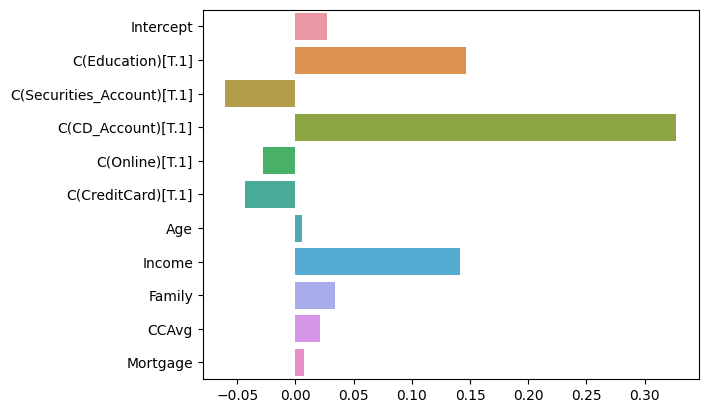

In [516]:
sns.barplot(x=result.params , y=result.params.index)
plt.show()

### SMOTE : 오버샘플링

In [403]:
X

Age  Experience  Income  Family  CCAvg  Mortgage  ZIP Code  Education  \
0      25           4      49       4   19.2         0     91107          1   
1      45          22      34       3   18.0         0     90089          1   
2      39          18      11       1   12.0         0     94720          1   
3      35          12     100       1   32.4         0     94112          2   
4      35          11      45       4   12.0         0     91330          2   
...   ...         ...     ...     ...    ...       ...       ...        ...   
4995   29           6      40       1   22.8         0     92697          3   
4996   30           7      15       4    4.8        85     92037          1   
4997   63          42      24       2    3.6         0     93023          3   
4998   65          43      49       3    6.0         0     90034          2   
4999   28           7      83       3    9.6         0     92612          1   

      Securities Account  CD Account  Online  CreditCard  Age_category  \
0                      1           0       0           0            25   
1                      1           0       0           0            45   
2                      0           0       0           0            35   
3                      0           0       0           0            35   
4                      0           0       0           1            35   
...                  ...         ...     ...         ...           ...   
4995                   0           0       1           0            25   
4996                   0           0       1           0            30   
4997                   0           0       0           0            60   
4998                   0           0       1           0            65   
4999                   0           0       1           1            25   

      ZIP Code 00  
0              11  
1               0  
2              47  
3              41  
4              13  
...           ...  
4995           26  
4996           20  
4997           30  
4998            0  
4999           26  

[5000 rows x 14 columns]

#### 트리

In [443]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dtree = DecisionTreeClassifier(max_depth=5)

score_a = []
score_f = []
score_r = []
score_p = []
score_re = []


for train_index, test_index in skfolds.split(X, y): 
    
    
        clone_clf = clone(dtree)
        X_train_folds = X.iloc[train_index]
        y_train_folds = y.iloc[train_index]

        X_test_fold = X.iloc[test_index]
        y_test_fold = y.iloc[test_index]
        
        # SMOTE
        smote = SMOTE(random_state=0) # 객체 생성
        X_train_over, y_train_over = smote.fit_resample(X_train_folds, y_train_folds) # fit_resample   
        
        print(y_train_over.mean())
     #   clone_clf.fit(X_train_over, y_train_over)
        clone_clf.fit(X_train_folds, y_train_folds)
        
        
        pred = clone_clf.predict(X_test_fold)
        pred_proba = clone_clf.predict_proba(X_test_fold)[:,1]  # Positive 확률

        a, f, r, p, re = get_clf_eval(y_test_fold, pred, pred_proba) 
        
        score_a.append(a)
        score_f.append(f)
        score_r.append(r)
        score_p.append(p)
        score_re.append(re)    
        

0.5
0.5
0.5
0.5
0.5


In [440]:
np.mean(score_a), np.mean(score_f), np.mean(score_r), np.mean(score_p), np.mean(score_r)

(0.975,
 0.8791583209015196,
 0.989581028761062,
 0.8254546083018998,
 0.989581028761062)

In [433]:
np.std(score_a), np.std(score_f), np.std(score_r)

(0.007071067811865481, 0.03088220063132486, 0.0052734404899255)

In [444]:
np.mean(score_a), np.mean(score_f), np.mean(score_r), np.mean(score_p), np.mean(score_r)

(0.9841999999999999,
 0.9147770485299089,
 0.9868455014749262,
 0.9455924731159764,
 0.9868455014749262)

#### 랜덤포레스트

In [455]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

RF = RandomForestClassifier(n_estimators=500)

score_a = []
score_f = []
score_r = []
score_p = []
score_re = []


for train_index, test_index in skfolds.split(X, y): 
    
    
        clone_clf = clone(RF)
        X_train_folds = X.iloc[train_index]
        y_train_folds = y.iloc[train_index]

        X_test_fold = X.iloc[test_index]
        y_test_fold = y.iloc[test_index]
        
        # SMOTE
        smote = SMOTE(random_state=0) # 객체 생성
        X_train_over, y_train_over = smote.fit_resample(X_train_folds, y_train_folds) # fit_resample   
        
        print(y_train_over.mean())
        clone_clf.fit(X_train_over, y_train_over)
        # clone_clf.fit(X_train_folds, y_train_folds)
        
        
        pred = clone_clf.predict(X_test_fold)
        pred_proba = clone_clf.predict_proba(X_test_fold)[:,1]  # Positive 확률

        a, f, r, p, re = get_clf_eval(y_test_fold, pred, pred_proba) 
        
        score_a.append(a)
        score_f.append(f)
        score_r.append(r)
        score_p.append(p)
        score_re.append(re) 

0.5
0.5
0.5
0.5
0.5


In [456]:
# 500
np.mean(score_a), np.mean(score_f), np.mean(score_r), np.mean(score_p), np.mean(score_r)

(0.9752000000000001,
 0.8772518116259997,
 0.9945151179941003,
 0.8366924937258622,
 0.9945151179941003)

In [449]:
# 디폴트
np.mean(score_a), np.mean(score_f), np.mean(score_r), np.mean(score_p), np.mean(score_r)

(0.9768000000000001,
 0.8849720627631076,
 0.9939216906342183,
 0.8473591905170853,
 0.9939216906342183)

In [450]:
np.std(score_a), np.std(score_f), np.std(score_r)

(0.007025667228100124, 0.03402962861318664, 0.002236067583220616)

#### 부스팅

In [451]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

GB = GradientBoostingClassifier()

score_a = []
score_f = []
score_r = []
score_p = []
score_re = []


for train_index, test_index in skfolds.split(X, y): 
    
    
        clone_clf = clone(GB)
        X_train_folds = X.iloc[train_index]
        y_train_folds = y.iloc[train_index]

        X_test_fold = X.iloc[test_index]
        y_test_fold = y.iloc[test_index]
        
        # SMOTE
        smote = SMOTE(random_state=0) # 객체 생성
        X_train_over, y_train_over = smote.fit_resample(X_train_folds, y_train_folds) # fit_resample   
        
        print(y_train_over.mean())
        clone_clf.fit(X_train_over, y_train_over)
        # clone_clf.fit(X_train_folds, y_train_folds)
        
        
        pred = clone_clf.predict(X_test_fold)
        pred_proba = clone_clf.predict_proba(X_test_fold)[:,1]  # Positive 확률

        a, f, r, p, re = get_clf_eval(y_test_fold, pred, pred_proba) 
        
        score_a.append(a)
        score_f.append(f)
        score_r.append(r)
        score_p.append(p)
        score_re.append(re) 

0.5
0.5
0.5
0.5
0.5


In [452]:
np.mean(score_a), np.mean(score_f), np.mean(score_r), np.mean(score_p), np.mean(score_r)

(0.9655999999999999,
 0.8398776147579934,
 0.9942155235988199,
 0.7594327176972968,
 0.9942155235988199)

In [453]:
np.std(score_a), np.std(score_f), np.std(score_r)

(0.002727636339397174, 0.012223627489359698, 0.0015624762062997938)

#### 로지스틱 회귀

In [539]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lr_clf = LogisticRegression(solver='lbfgs', penalty = 'none', max_iter=10000)

score_a = []
score_f = []
score_r = []
score_p = []
score_re = []


for train_index, test_index in skfolds.split(X_lr_scaled, y): 
    
    
        clone_clf = clone(lr_clf)
        X_train_folds = X.iloc[train_index]
        y_train_folds = y.iloc[train_index]

        X_test_fold = X.iloc[test_index]
        y_test_fold = y.iloc[test_index]
        
        # SMOTE
        smote = SMOTE(random_state=0) # 객체 생성
        X_train_over, y_train_over = smote.fit_resample(X_train_folds, y_train_folds) # fit_resample   
        
        print(y_train_over.mean())
        clone_clf.fit(X_train_over, y_train_over)
        # clone_clf.fit(X_train_folds, y_train_folds)
        
        
        pred = clone_clf.predict(X_test_fold)
        pred_proba = clone_clf.predict_proba(X_test_fold)[:,1]  # Positive 확률

        a, f, r, p, re = get_clf_eval(y_test_fold, pred, pred_proba) 
        
        score_a.append(a)
        score_f.append(f)
        score_r.append(r)
        score_p.append(p)
        score_re.append(re) 

0.5
0.5
0.5
0.5
0.5


In [540]:
np.mean(score_a), np.mean(score_f), np.mean(score_r), np.mean(score_p), np.mean(score_r)

(0.8618,
 0.5452671579564441,
 0.9278714970501476,
 0.40003069103480016,
 0.9278714970501476)

In [541]:
np.std(score_a), np.std(score_f), np.std(score_r)

(0.015967466924969673, 0.03528909400032216, 0.014663866054852885)

### 컬러 DT
 - 기존 트리에 피피티로 작업함

https://stackoverflow.com/questions/42891148/changing-colors-for-decision-tree-plot-created-using-export-graphviz
https://stackoverflow.com/questions/43214350/color-of-the-node-of-tree-with-graphviz-using-class-names

#### 구현 시도

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
X = df_ordered.drop(columns='Personal Loan')
y = df_ordered['Personal Loan']

tree = DecisionTreeClassifier(max_depth=3,random_state=0)

In [ ]:
tree.fit(X,y)

g = export_graphviz(tree, out_file=None, feature_names=X.columns, filled=True, impurity=False)

In [ ]:
graph = pydotplus.graph_from_dot_data(g)
nodes = graph.get_node_list()
edges = graph.get_edge_list()

In [123]:
for edge in edges :

    print(edge.get_source())

0
1
2
2
1
5
5
0
8
9
9
8
12
12


In [126]:
dot_graph.split('\n')

['digraph Tree {',
 'node [shape=box, style="filled", color="black", fontname="helvetica"] ;',
 'edge [fontname="helvetica"] ;',
 '0 [label="Income <= 113.5\\nsamples = 5000\\nvalue = [4520, 480]", fillcolor="#e88e4e"] ;',
 '1 [label="CCAvg <= 35.4\\nsamples = 4021\\nvalue = [3937, 84]", fillcolor="#e6843d"] ;',
 '0 -> 1  ;',
 '0 -> 1  ;',
 '2 [label="Income <= 106.5\\nsamples = 3723\\nvalue = [3710, 13]", fillcolor="#e5813a"] ;',
 '1 -> 2 ;',
 '1 -> 2 ;',
 '3 [label="samples = 3629\\nvalue = [3629, 0]", fillcolor="#e58139"] ;',
 '2 -> 3 ;',
 '4 [label="samples = 94\\nvalue = [81, 13]", fillcolor="#e99559"] ;',
 '2 -> 4 ;',
 '5 [label="CD Account <= 0.5\\nsamples = 298\\nvalue = [227, 71]", fillcolor="#eda877"] ;',
 '1 -> 5 ;',
 '6 [label="samples = 272\\nvalue = [221, 51]", fillcolor="#eb9e67"] ;',
 '5 -> 6 ;',
 '7 [label="samples = 26\\nvalue = [6, 20]", fillcolor="#74baed"] ;',
 '5 -> 7 ;',
 '8 [label="Education <= 1.5\\nsamples = 979\\nvalue = [583, 396]", fillcolor="#f7d7bf"] ;',


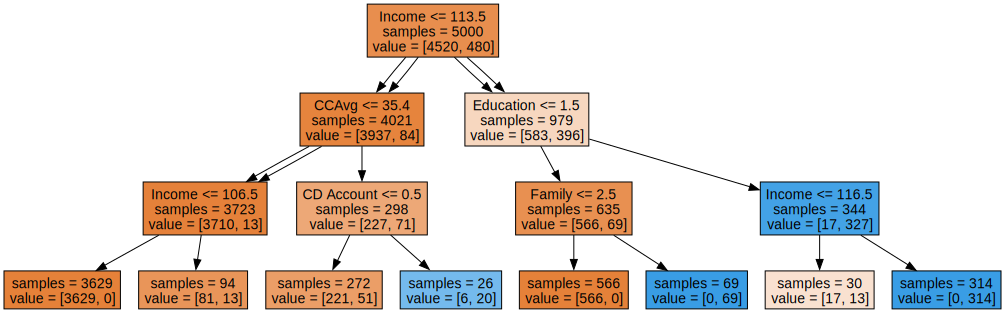

In [93]:
with open("tree.dot") as f :

    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [94]:
! pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 5.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=59d22a559c22725f813689407d26ea1ec143f8df8077bd39d569d6efb0418d53
  Stored in directory: /Users/passiona2z/Library/Caches/pip/wheels/89/e5/de/6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [139]:
≈[(df_ordered['Income'] > 113.5) & (df_ordered['Family'] >= 3)]['Personal Loan'].mean()

0.9737991266375546

In [141]:
df_ordered[(df_ordered['Income'] > 113.5) & (df_ordered['Education'] <= 1) & (df_ordered['Family'] >= 3)]['Personal Loan'].mean()

1.0

#### 동질성 검증

In [106]:
li = []

for train_index, _ in skfolds.split(X, y) :

    li.append(train_index)

In [107]:
ind = li[3]

In [108]:
check = df_ordered.iloc[ind]

In [109]:
check.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage',
       'ZIP Code', 'Education', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Personal Loan'],
      dtype='object')

In [110]:
check[(check['Income'] <= 113.5) & (check['CCAvg'] > 35.4) & (check['CD Account'] <= 0.5)]

Age  Experience  Income  Family  CCAvg  Mortgage  ZIP Code  Education  \
44     46          20     104       1   68.4         0     94065          1   
48     56          26      81       2   54.0         0     95747          3   
64     47          23     105       2   39.6         0     90024          1   
73     41          16      85       1   48.0         0     94606          3   
82     41          16      82       1   48.0         0     92507          3   
...   ...         ...     ...     ...    ...       ...       ...        ...   
4923   40          15      73       3   36.0         0     92029          1   
4925   64          39      82       4   40.8         0     94025          2   
4932   59          35     111       1   51.6         0     91107          1   
4960   58          28      81       1   36.0         0     91604          3   
4963   32           6      98       2   54.0       306     95054          3   

      Securities Account  CD Account  Online  CreditCard  Personal Loan  
44                     0           0       1           1              0  
48                     0           0       0           1              0  
64                     0           0       0           0              0  
73                     0           0       1           1              0  
82                     0           0       1           0              0  
...                  ...         ...     ...         ...            ...  
4923                   0           0       1           1              0  
4925                   0           0       1           0              0  
4932                   0           0       1           0              0  
4960                   0           0       1           0              0  
4963                   0           0       0           0              0  

[214 rows x 13 columns]

In [132]:
# 1번 (소득 <= 113.5) & (카드소비액 > 35.4) & (CD 계좌 X)

condi = (check['Income'] <= 113.5) & (check['CCAvg'] > 35.4) & (check['CD Account'] <= 0.5) 
print(check[condi]['Personal Loan'].value_counts(normalize=True))
check[condi]['Personal Loan'].value_counts()

0    0.82243
1    0.17757
Name: Personal Loan, dtype: float64


0    176
1     38
Name: Personal Loan, dtype: int64

In [133]:
# (소득 <= 113.5)  & (CD 계좌 X)

condi = (check['Income'] <= 113.5) & (check['CD Account'] <= 0.5) 
print(check[condi]['Personal Loan'].value_counts(normalize=True))
check[condi]['Personal Loan'].value_counts()

0    0.985065
1    0.014935
Name: Personal Loan, dtype: float64


0    3034
1      46
Name: Personal Loan, dtype: int64

0    3034
1      46
Name: Personal Loan, dtype: int64

In [142]:
# 2번 (소득 <= 113.5) & (카드소비액 > 35.4) & (CD 계좌 보유)

condi = (check['Income'] <= 113.5) & (check['CCAvg'] > 35.4) & (check['CD Account'] > 0.5) 
print(check[condi]['Personal Loan'].value_counts(normalize=True))
check[condi]['Personal Loan'].value_counts()

1    0.75
0    0.25
Name: Personal Loan, dtype: float64


1    18
0     6
Name: Personal Loan, dtype: int64

In [143]:
# (카드소비액 > 35.4) & (CD 계좌 보유)

condi = (check['CCAvg'] > 35.4) & (check['CD Account'] > 0.5) 
print(check[condi]['Personal Loan'].value_counts(normalize=True))
check[condi]['Personal Loan'].value_counts()

1    0.838384
0    0.161616
Name: Personal Loan, dtype: float64


1    83
0    16
Name: Personal Loan, dtype: int64

In [126]:
# 3번 (소득 > 113.5) & (교육수준 : 학사) & (가족 수 : 2명 이하)           

condi = (check['Income'] > 113.5) & (check['Education'] < 1.5) & (check['Family'] < 2.5) 
print(check[condi]['Personal Loan'].value_counts(normalize=True))
check[condi]['Personal Loan'].count()

0    1.0
Name: Personal Loan, dtype: float64


454

In [204]:
condi =  (check['Education'] < 1.5) & (check['Family'] < 2.5) 
print(check[condi]['Personal Loan'].value_counts(normalize=True))
check[condi]['Personal Loan'].value_counts()

0    0.989662
1    0.010338
Name: Personal Loan, dtype: float64


0    1053
1      11
Name: Personal Loan, dtype: int64

In [128]:
# 4번 (소득 > 113.5) & (교육수준 : 학사) & (가족 수 : 3명 이상) 

condi = (check['Income'] > 113.5) & (check['Education'] < 1.5) & (check['Family'] > 2.5) 
print(check[condi]['Personal Loan'].value_counts(normalize=True))
check[condi]['Personal Loan'].count()

1    1.0
Name: Personal Loan, dtype: float64


62

In [212]:
# 4번 (소득 > 113.5) & (교육수준 : 학사) & (가족 수 : 3명 이상) 

condi = (check['Income'] > 113.5) & (check['Family'] > 2.5) 
print(check[condi]['Personal Loan'].value_counts(normalize=True))
check[condi]['Personal Loan'].value_counts()

1    0.977778
0    0.022222
Name: Personal Loan, dtype: float64


1    176
0      4
Name: Personal Loan, dtype: int64

In [171]:
from statsmodels.stats.proportion import proportions_ztest

In [199]:
count = 3034

n_obs = 3080
z, p = proportions_ztest(count, n_obs, 0.822)

In [200]:
np.round(p,4)

0.0

In [201]:
count = 83
n_obs = 99
z, p = proportions_ztest(count, n_obs, 0.75)

In [202]:
round(p,4)

0.0169

In [210]:
count = 1053
n_obs = 1064
z, p = proportions_ztest(count, n_obs, 1.0)

In [211]:
round(p,4)

0.0009

In [213]:
count = 176
n_obs = 180
z, p = proportions_ztest(count, n_obs, 1.0)

In [214]:
round(p,4)

0.0431